In [1]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.1 MB/s eta 0:00:00


In [2]:
import mne

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
raw = mne.io.read_raw_brainvision(
    "/content/drive/MyDrive/VP005/nback2.vhdr",
    preload=True
)

Extracting parameters from /content/drive/MyDrive/VP005/nback2.vhdr...
Setting channel info structure...


/tmp/ipython-input-2064617679.py:1: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1000.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(


Reading 0 ... 696819  =      0.000 ...   696.819 secs...


In [ ]:
raw.info['ch_names']

['FP1',
 'AFF5',
 'AFz',
 'F1',
 'FC5',
 'FC1',
 'T7',
 'C3',
 'Cz',
 'CP5',
 'CP1',
 'P7',
 'P3',
 'Pz',
 'POz',
 'O1',
 'FP2',
 'AFF6',
 'F2',
 'FC2',
 'FC6',
 'C4',
 'T8',
 'CP2',
 'CP6',
 'P4',
 'P8',
 'O2',
 'HEOG',
 'VEOG']

Using matplotlib as 2D backend.


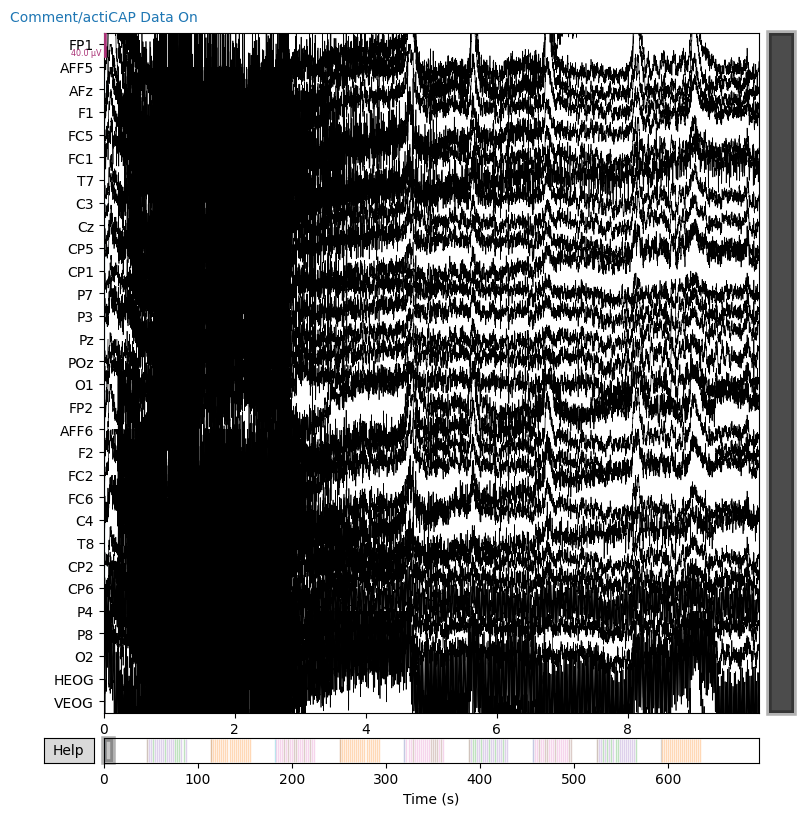

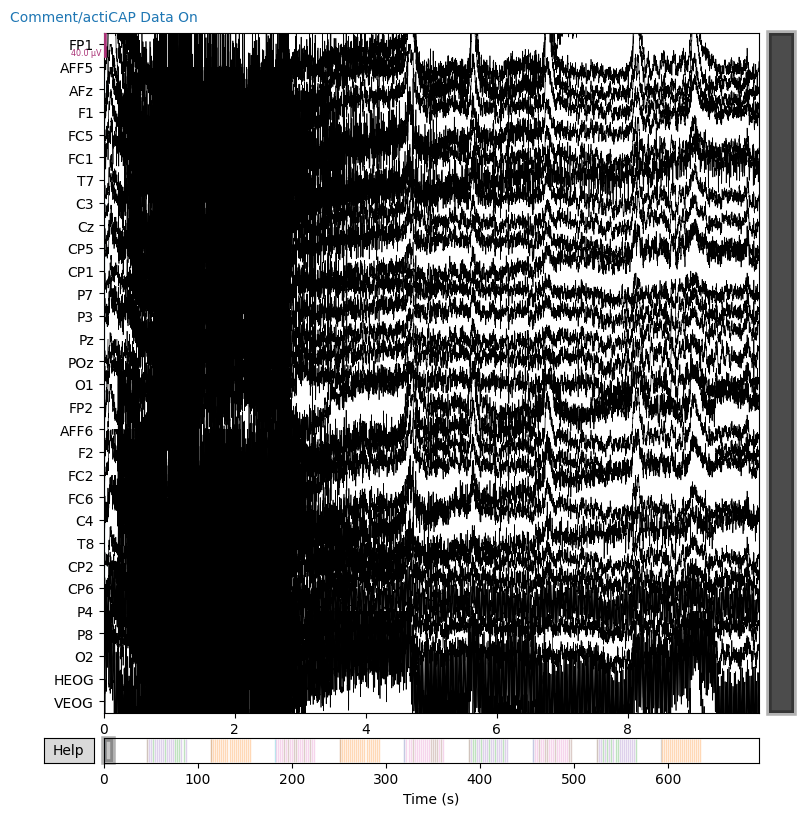

In [ ]:
raw.plot(n_channels=32, duration=10)

In [ ]:
raw.info['sfreq']

1000.0

In [5]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('Stimulus/S 16'), np.str_('Stimulus/S 48'), np.str_('Stimulus/S 64'), np.str_('Stimulus/S 80'), np.str_('Stimulus/S 96'), np.str_('Stimulus/S112'), np.str_('Stimulus/S128'), np.str_('Stimulus/S144')]


In [6]:
events

array([[     0,      0,  10001],
       [ 45726,      0,    128],
       [ 45777,      0,     64],
       [ 47925,      0,     64],
       [ 50111,      0,     64],
       [ 52279,      0,     48],
       [ 54439,      0,     64],
       [ 56627,      0,     64],
       [ 58785,      0,     64],
       [ 60980,      0,     64],
       [ 63132,      0,     64],
       [ 65348,      0,     48],
       [ 67496,      0,     64],
       [ 69671,      0,     64],
       [ 71834,      0,     64],
       [ 73975,      0,     64],
       [ 76144,      0,     48],
       [ 78311,      0,     48],
       [ 80444,      0,     48],
       [ 82600,      0,     64],
       [ 84773,      0,     48],
       [ 86910,      0,     64],
       [114177,      0,    112],
       [114235,      0,     16],
       [116395,      0,     16],
       [118562,      0,     16],
       [120702,      0,     16],
       [122886,      0,     16],
       [125051,      0,     16],
       [127232,      0,     16],
       [12

In [ ]:
event_id

{np.str_('Comment/actiCAP Data On'): 10001,
 np.str_('Stimulus/S 16'): 16,
 np.str_('Stimulus/S 48'): 48,
 np.str_('Stimulus/S 64'): 64,
 np.str_('Stimulus/S 80'): 80,
 np.str_('Stimulus/S 96'): 96,
 np.str_('Stimulus/S112'): 112,
 np.str_('Stimulus/S128'): 128,
 np.str_('Stimulus/S144'): 144}

In [ ]:
stim_event_id = {
    "0back_target": event_id["Stimulus/S 16"],
    "2back_target": event_id["Stimulus/S 48"],
    "2back_nontarget": event_id["Stimulus/S 64"],
    "3back_target": event_id["Stimulus/S 80"],
    "3back_nontarget": event_id["Stimulus/S 96"],
}

In [ ]:
epochs = mne.Epochs(
    raw,
    events,
    event_id=stim_event_id,
    tmin=-0.2,
    tmax=0.8,
    baseline=(-0.2, 0),
    preload=True
)

Not setting metadata
180 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 180 events and 1001 original time points ...
0 bad epochs dropped


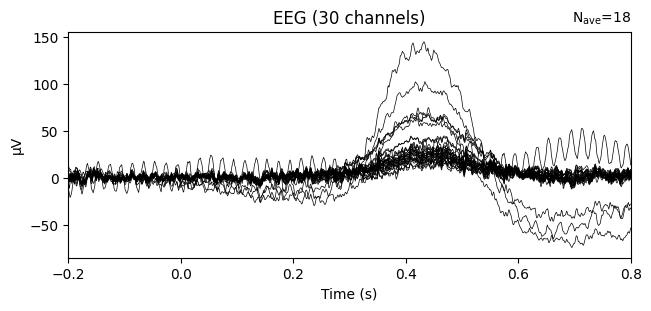

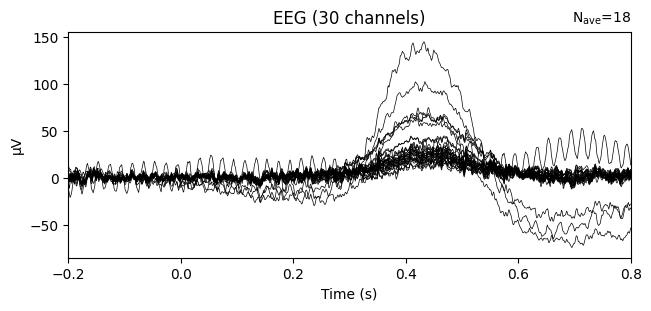

In [ ]:
epochs["2back_target"].average().plot()

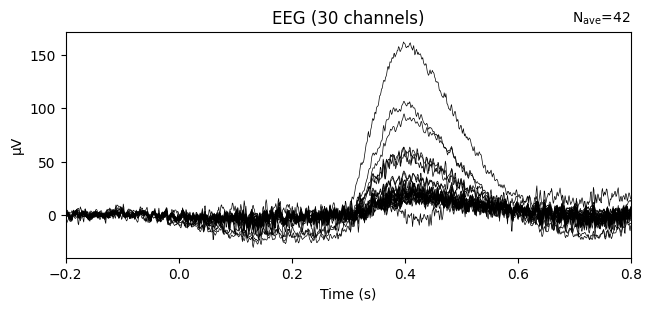

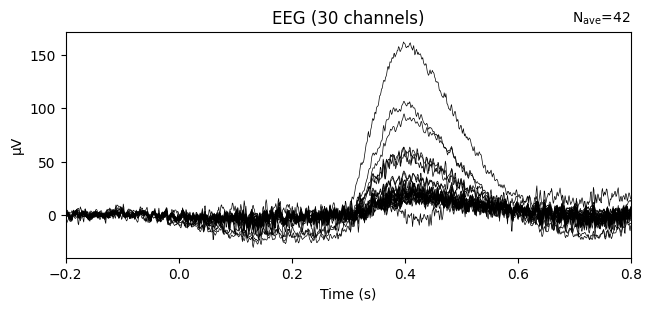

In [ ]:
epochs["2back_nontarget"].average().plot()

In [ ]:
event_id.keys()

dict_keys([np.str_('Comment/actiCAP Data On'), np.str_('Stimulus/S 16'), np.str_('Stimulus/S 48'), np.str_('Stimulus/S 64'), np.str_('Stimulus/S 80'), np.str_('Stimulus/S 96'), np.str_('Stimulus/S112'), np.str_('Stimulus/S128'), np.str_('Stimulus/S144')])

In [ ]:
event_id

{np.str_('Comment/actiCAP Data On'): 10001,
 np.str_('Stimulus/S 16'): 16,
 np.str_('Stimulus/S 48'): 48,
 np.str_('Stimulus/S 64'): 64,
 np.str_('Stimulus/S 80'): 80,
 np.str_('Stimulus/S 96'): 96,
 np.str_('Stimulus/S112'): 112,
 np.str_('Stimulus/S128'): 128,
 np.str_('Stimulus/S144'): 144}

In [ ]:
stim_event_id

{'0back_target': 16,
 '2back_target': 48,
 '2back_nontarget': 64,
 '3back_target': 80,
 '3back_nontarget': 96}

In [ ]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('Stimulus/S 16'), np.str_('Stimulus/S 48'), np.str_('Stimulus/S 64'), np.str_('Stimulus/S 80'), np.str_('Stimulus/S 96'), np.str_('Stimulus/S112'), np.str_('Stimulus/S128'), np.str_('Stimulus/S144')]


In [ ]:
events

array([[     0,      0,  10001],
       [ 45726,      0,    128],
       [ 45777,      0,     64],
       [ 47925,      0,     64],
       [ 50111,      0,     64],
       [ 52279,      0,     48],
       [ 54439,      0,     64],
       [ 56627,      0,     64],
       [ 58785,      0,     64],
       [ 60980,      0,     64],
       [ 63132,      0,     64],
       [ 65348,      0,     48],
       [ 67496,      0,     64],
       [ 69671,      0,     64],
       [ 71834,      0,     64],
       [ 73975,      0,     64],
       [ 76144,      0,     48],
       [ 78311,      0,     48],
       [ 80444,      0,     48],
       [ 82600,      0,     64],
       [ 84773,      0,     48],
       [ 86910,      0,     64],
       [114177,      0,    112],
       [114235,      0,     16],
       [116395,      0,     16],
       [118562,      0,     16],
       [120702,      0,     16],
       [122886,      0,     16],
       [125051,      0,     16],
       [127232,      0,     16],
       [12

In [ ]:
print(epochs.event_id)
print(len(epochs["2back_target"]))
print(len(epochs["2back_nontarget"]))

{'0back_target': 16, '2back_target': 48, '2back_nontarget': 64, '3back_target': 80, '3back_nontarget': 96}
18
42


In [ ]:
import numpy as np

In [ ]:
np.unique(events[events[:,2] == 48][:,0]).shape   # 2-back target


(18,)

In [ ]:
np.unique(events[events[:,2] == 64][:,0]).shape   # 2-back non-target

(42,)

combining channels using "mean"
combining channels using "mean"


/tmp/ipython-input-4166183527.py:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(
/tmp/ipython-input-4166183527.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


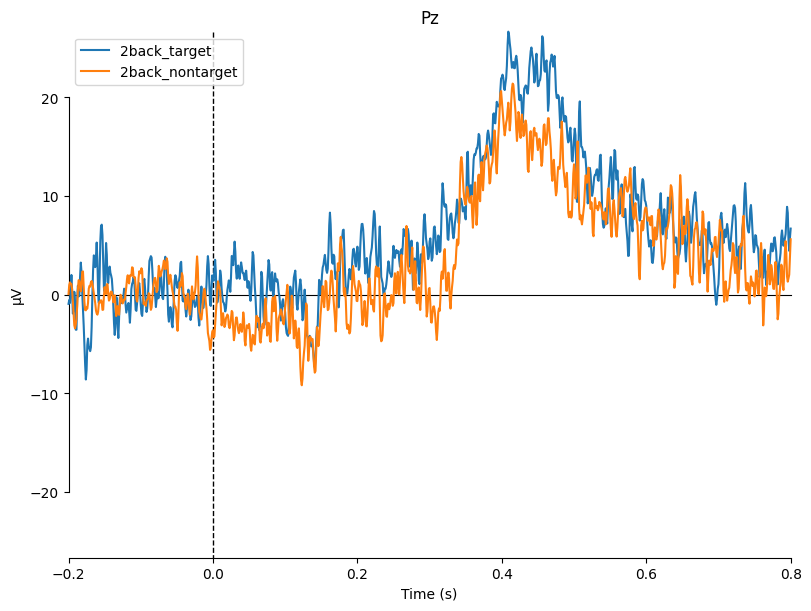

[<Figure size 800x600 with 1 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds(
    {
        "2back_target": epochs["2back_target"].average(),
        "2back_nontarget": epochs["2back_nontarget"].average(),
    },
    picks="Pz",
    combine="mean"
)

In [ ]:
from collections import Counter
Counter(events[:, 2])

Counter({np.int64(10001): 1,
         np.int64(128): 3,
         np.int64(64): 42,
         np.int64(48): 18,
         np.int64(112): 3,
         np.int64(16): 60,
         np.int64(144): 3,
         np.int64(96): 42,
         np.int64(80): 18})

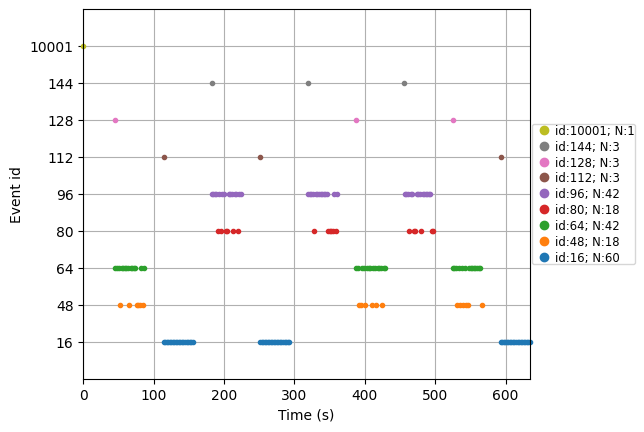

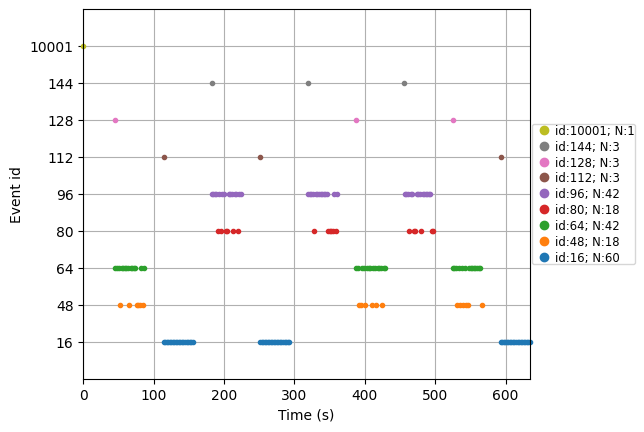

In [ ]:
mne.viz.plot_events(events, sfreq=raw.info["sfreq"])

In [ ]:
print(raw)

<RawBrainVision | nback2.eeg, 30 x 696820 (696.8 s), ~159.5 MiB, data loaded>


In [ ]:
raw.info["sfreq"]

1000.0

In [ ]:
epochs = mne.Epochs(
    raw,
    events,
    tmin=-0.2,
    tmax=0.8,
    preload=True
)

Not setting metadata
190 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 190 events and 1001 original time points ...
1 bad epochs dropped


In [ ]:
epochs.get_data().shape

(189, 30, 1001)

In [ ]:
sfreq = raw.info["sfreq"]
window_sec = 2
window_samples = int(window_sec * sfreq)

window_samples

2000

In [ ]:
block_codes = {112: "0back", 128: "2back", 144: "3back"}

In [ ]:
block_samples = [
    (e[0], block_codes[e[2]])
    for e in events
    if e[2] in block_codes
]

In [ ]:
block_samples

[(np.int64(45726), '2back'),
 (np.int64(114177), '0back'),
 (np.int64(182572), '3back'),
 (np.int64(251135), '0back'),
 (np.int64(319705), '3back'),
 (np.int64(388102), '2back'),
 (np.int64(456435), '3back'),
 (np.int64(524743), '2back'),
 (np.int64(593215), '0back')]

In [ ]:
samples_only = [s for s, _ in block_samples]

In [ ]:

assert samples_only == sorted(samples_only)

In [ ]:
sfreq = raw.info["sfreq"]

block_info = []


In [ ]:
for i in range(len(block_samples) - 1):
    start_samp, label = block_samples[i]
    end_samp, _ = block_samples[i + 1]

    duration_sec = (end_samp - start_samp) / sfreq
    block_info.append((label, duration_sec))


In [ ]:
block_info

[('2back', np.float64(68.451)),
 ('0back', np.float64(68.395)),
 ('3back', np.float64(68.563)),
 ('0back', np.float64(68.57)),
 ('3back', np.float64(68.397)),
 ('2back', np.float64(68.333)),
 ('3back', np.float64(68.308)),
 ('2back', np.float64(68.472))]

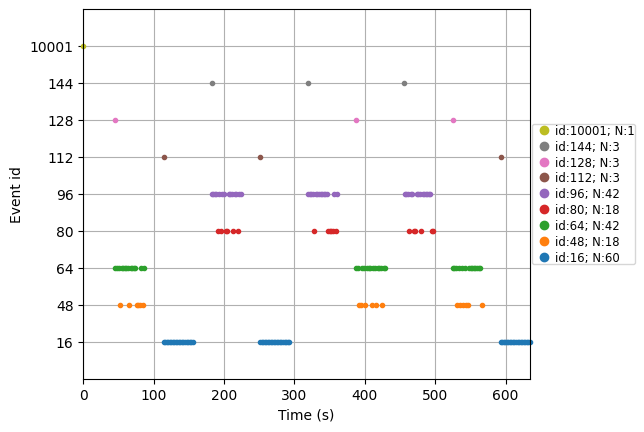

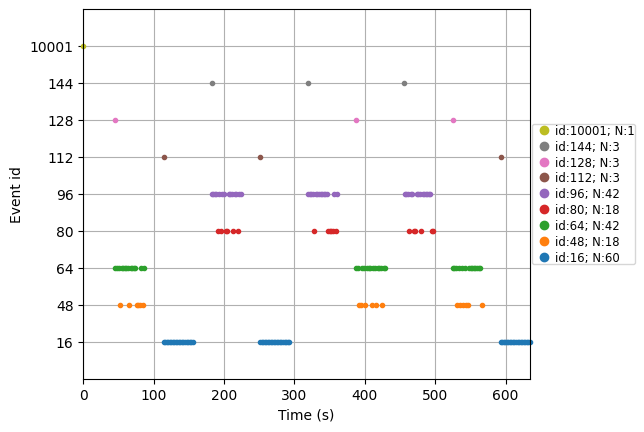

In [ ]:
mne.viz.plot_events(events, sfreq=sfreq)

In [ ]:
raw.n_times

np.int64(696820)

In [ ]:
print(raw.get_data().shape)
print(events[:5])

(30, 696820)
[[    0     0 10001]
 [45726     0   128]
 [45777     0    64]
 [47925     0    64]
 [50111     0    64]]


In [ ]:
events

array([[     0,      0,  10001],
       [ 45726,      0,    128],
       [ 45777,      0,     64],
       [ 47925,      0,     64],
       [ 50111,      0,     64],
       [ 52279,      0,     48],
       [ 54439,      0,     64],
       [ 56627,      0,     64],
       [ 58785,      0,     64],
       [ 60980,      0,     64],
       [ 63132,      0,     64],
       [ 65348,      0,     48],
       [ 67496,      0,     64],
       [ 69671,      0,     64],
       [ 71834,      0,     64],
       [ 73975,      0,     64],
       [ 76144,      0,     48],
       [ 78311,      0,     48],
       [ 80444,      0,     48],
       [ 82600,      0,     64],
       [ 84773,      0,     48],
       [ 86910,      0,     64],
       [114177,      0,    112],
       [114235,      0,     16],
       [116395,      0,     16],
       [118562,      0,     16],
       [120702,      0,     16],
       [122886,      0,     16],
       [125051,      0,     16],
       [127232,      0,     16],
       [12

In [ ]:
sfreq = raw.info["sfreq"]

In [ ]:
block_codes = {
    112: "0-back",
    128: "2-back",
    144: "3-back",
}

In [ ]:

block_events = [
    (e[0], block_codes[e[2]])
    for e in events
    if e[2] in block_codes
]

In [ ]:
block_events

[(np.int64(45726), '2-back'),
 (np.int64(114177), '0-back'),
 (np.int64(182572), '3-back'),
 (np.int64(251135), '0-back'),
 (np.int64(319705), '3-back'),
 (np.int64(388102), '2-back'),
 (np.int64(456435), '3-back'),
 (np.int64(524743), '2-back'),
 (np.int64(593215), '0-back')]

In [ ]:
sfreq = raw.info["sfreq"]  # 1000 Hz

In [ ]:
block_events = [
    (45726, '2-back'),
    (114177, '0-back'),
    (182572, '3-back'),
    (251135, '0-back'),
    (319705, '3-back'),
    (388102, '2-back'),
    (456435, '3-back'),
    (524743, '2-back'),
    (593215, '0-back'),
]

In [ ]:
for i in range(len(block_events) - 1):
    s0, label0 = block_events[i]
    s1, label1 = block_events[i + 1]
    duration_sec = (s1 - s0) / sfreq
    print(f"{label0} → {label1}: {duration_sec:.1f} seconds")

2-back → 0-back: 68.5 seconds
0-back → 3-back: 68.4 seconds
3-back → 0-back: 68.6 seconds
0-back → 3-back: 68.6 seconds
3-back → 2-back: 68.4 seconds
2-back → 3-back: 68.3 seconds
3-back → 2-back: 68.3 seconds
2-back → 0-back: 68.5 seconds


In [ ]:
block_starts = [s for s, _ in block_events]

In [ ]:
for s in block_starts[:3]:
    next_stim = events[(events[:,0] > s) & (events[:,2] < 100)][0]
    delay = (next_stim[0] - s) / sfreq
    print(f"Delay to first stimulus: {delay:.2f} s")

Delay to first stimulus: 0.05 s
Delay to first stimulus: 0.06 s
Delay to first stimulus: 0.05 s


In [ ]:
stim_codes = {16, 48, 64, 80, 96}

In [ ]:

for i in range(len(block_events) - 1):
    start = block_events[i][0]
    end   = block_events[i+1][0]

    stim_times = events[
        (events[:,0] > start) &
        (events[:,0] < end) &
        (np.isin(events[:,2], list(stim_codes)))
    ]

    stim_duration = (stim_times[-1,0] - stim_times[0,0]) / sfreq
    print(f"{block_events[i][1]}: stimuli span {stim_duration:.1f} s")

2-back: stimuli span 41.1 s
0-back: stimuli span 41.1 s
3-back: stimuli span 41.3 s
0-back: stimuli span 41.2 s
3-back: stimuli span 41.1 s
2-back: stimuli span 41.0 s
3-back: stimuli span 41.0 s
2-back: stimuli span 41.2 s


In [ ]:
stim_codes  = {16, 48, 64, 80, 96}
block_codes = {112: "0back", 128: "2back", 144: "3back"}
sfreq = raw.info["sfreq"]

In [ ]:
task_segments = []

for i in range(len(block_events) - 1):
    block_start, label = block_events[i]
    next_block_start, _ = block_events[i + 1]

    # find stimuli within this block
    stim_events = events[
        (events[:,0] > block_start) &
        (events[:,0] < next_block_start) &
        (np.isin(events[:,2], list(stim_codes)))
    ]

    if len(stim_events) == 0:
        continue

    task_start = stim_events[0, 0]
    task_end   = stim_events[-1, 0]

    task_segments.append((task_start, task_end, label))

In [ ]:
for start, end, label in task_segments:
    print(label, (end - start) / sfreq)

2-back 41.133
0-back 41.126
3-back 41.255
0-back 41.246
3-back 41.103
2-back 41.045
3-back 41.013
2-back 41.169


In [ ]:
window_sec = 2.0     # window length
step_sec   = 0.5     # stride (overlap allowed)

sfreq = raw.info["sfreq"]
win_len = int(window_sec * sfreq)   # samples per window
step    = int(step_sec * sfreq)

In [ ]:
X = []   # EEG windows
y = []   # workload labels
meta = []  # (start_sample, end_sample) for sanity checks

for task_start, task_end, label in task_segments:
    block_data = raw.get_data(start=task_start, stop=task_end)

    n_samples = block_data.shape[1]

    for i in range(0, n_samples - win_len + 1, step):
        window = block_data[:, i:i + win_len]

        X.append(window)
        y.append(label)
        meta.append((task_start + i, task_start + i + win_len))

In [ ]:
import numpy as np

X = np.stack(X)     # shape: (n_windows, n_channels, n_samples)
y = np.array(y)

In [ ]:
for (w_start, w_end), (task_start, task_end, _) in zip(meta,
    [(ts, te, l) for ts, te, l in task_segments for _ in range(
        ((te - ts - win_len) // step) + 1
    )]
):
    assert w_start >= task_start
    assert w_end   <= task_end

In [ ]:
assert X.shape[2] == win_len

In [ ]:
set(y)

{np.str_('0-back'), np.str_('2-back'), np.str_('3-back')}

In [ ]:
from collections import Counter
Counter(y)

Counter({np.str_('2-back'): 237,
         np.str_('0-back'): 158,
         np.str_('3-back'): 237})

In [ ]:
task_segments = []

for i, (block_start, label) in enumerate(block_events):
    if i < len(block_events) - 1:
        block_end = block_events[i + 1][0]
    else:
        block_end = raw.n_times   # end of recording

    stim_events = events[
        (events[:,0] > block_start) &
        (events[:,0] < block_end) &
        (np.isin(events[:,2], list(stim_codes)))
    ]

    if len(stim_events) == 0:
        continue

    task_start = stim_events[0,0]
    task_end   = stim_events[-1,0]

    task_segments.append((task_start, task_end, label))

In [ ]:
task_segments = []

for i, (block_start, label) in enumerate(block_events):
    if i < len(block_events) - 1:
        block_end = block_events[i + 1][0]
    else:
        block_end = raw.n_times   # end of recording

    stim_events = events[
        (events[:,0] > block_start) &
        (events[:,0] < block_end) &
        (np.isin(events[:,2], list(stim_codes)))
    ]

    if len(stim_events) == 0:
        continue

    task_start = stim_events[0,0]
    task_end   = stim_events[-1,0]

    task_segments.append((task_start, task_end, label))

In [ ]:
Counter(y)

Counter({np.str_('2-back'): 237,
         np.str_('0-back'): 158,
         np.str_('3-back'): 237})

In [ ]:
from collections import Counter
Counter([label for _, _, label in task_segments])

Counter({'2-back': 3, '0-back': 3, '3-back': 3})

In [ ]:
# last block start
last_block_start, last_label = block_events[-1]
last_block_start, last_label

(593215, '0-back')

In [ ]:
stim_codes = {16, 48, 64, 80, 96}

stim_events_last = events[
    (events[:,0] > last_block_start) &
    (np.isin(events[:,2], list(stim_codes)))
]

len(stim_events_last)

20

In [ ]:
(stim_events_last[-1,0] - stim_events_last[0,0]) / sfreq

np.float64(41.08)

In [ ]:
for start, end, label in task_segments:
    n_samples = end - start
    n_windows = ((n_samples - win_len) // step) + 1
    print(label, n_windows)

2-back 79
0-back 79
3-back 79
0-back 79
3-back 79
2-back 79
3-back 79
2-back 79
0-back 79


In [ ]:
len(task_segments), sum(79 for _ in task_segments)

(9, 711)

In [ ]:
X.shape[0], len(y)

(632, 632)

In [ ]:
X = []
y = []
meta = []

for task_start, task_end, label in task_segments:
    block_data = raw.get_data(start=task_start, stop=task_end)
    n_samples = block_data.shape[1]

    for i in range(0, n_samples - win_len + 1, step):
        X.append(block_data[:, i:i+win_len])
        y.append(label)
        meta.append((task_start+i, task_start+i+win_len))

In [ ]:
from collections import Counter
Counter(y)

Counter({'2-back': 237, '0-back': 237, '3-back': 237})

In [ ]:
sfreq = raw.info["sfreq"]
stim_codes = {16, 48, 64, 80, 96}

# pick one block (e.g. the first)
block_start, label = block_events[0]
next_block_start, _ = block_events[1]

# find stimuli in this block
stim_events = events[
    (events[:,0] > block_start) &
    (events[:,0] < next_block_start) &
    (np.isin(events[:,2], list(stim_codes)))
]

task_start = stim_events[0, 0]
task_end   = stim_events[-1, 0]

# define rest as AFTER last stimulus
rest_start = task_end
rest_end   = next_block_start

In [ ]:
task_eeg = raw.get_data(start=task_start, stop=task_end)
rest_eeg = raw.get_data(start=rest_start, stop=rest_end)

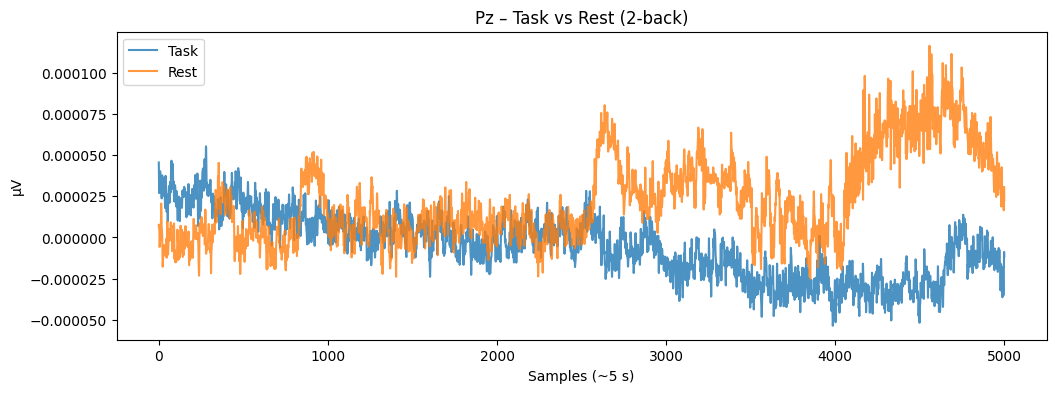

In [ ]:
import matplotlib.pyplot as plt

ch = raw.ch_names.index("Pz")  # or any channel you like

plt.figure(figsize=(12,4))
plt.plot(task_eeg[ch][:5000], label="Task", alpha=0.8)
plt.plot(rest_eeg[ch][:5000], label="Rest", alpha=0.8)
plt.title(f"Pz – Task vs Rest ({label})")
plt.xlabel("Samples (~5 s)")
plt.ylabel("µV")
plt.legend()
plt.show()


In [ ]:
import numpy as np

X = np.array(X)   # (711, 30, 2000)
y = np.array(y)
print(X.shape, y.shape)

(711, 30, 2000) (711,)


In [ ]:
import mne

sfreq = raw.info["sfreq"]        # 1000
target_sfreq = 250
decim = int(sfreq / target_sfreq)

X_ds = mne.filter.resample(
    X, down=decim, axis=2
)

print(X_ds.shape)
# expected: (711, 30, 500)

(711, 30, 500)


In [ ]:
# z-score per channel across time
X_ds = (X_ds - X_ds.mean(axis=2, keepdims=True)) / (
    X_ds.std(axis=2, keepdims=True) + 1e-6
)

In [ ]:
label_map = {"0-back": 0, "2-back": 1, "3-back": 2}
y_idx = np.array([label_map[l] for l in y])

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class EEGWindowDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:

ds = EEGWindowDataset(X_ds, y_idx)
loader = DataLoader(ds, batch_size=32, shuffle=True)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class EEGWindowEncoder(nn.Module):
    def __init__(self, n_ch=30, n_time=500, emb_dim=128):
        super().__init__()

        # temporal filtering (learns freq bands)
        self.temporal = nn.Conv2d(
            in_channels=1,
            out_channels=16,
            kernel_size=(1, 64),
            padding=(0, 32),
            bias=False
        )

        # spatial filtering (CSP-like)
        self.spatial = nn.Conv2d(
            in_channels=16,
            out_channels=32,
            kernel_size=(n_ch, 1),
            groups=16,
            bias=False
        )

        self.bn = nn.BatchNorm2d(32)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

        self.fc = nn.Linear(32, emb_dim)

    def forward(self, x):
        # x: (B, C, T)
        x = x.unsqueeze(1)      # (B, 1, C, T)
        x = self.temporal(x)
        x = self.spatial(x)
        x = self.bn(x)
        x = F.elu(x)
        x = self.pool(x)
        x = x.squeeze(-1).squeeze(-1)
        return self.fc(x)

In [ ]:
model = EEGWindowEncoder()
xb, yb = next(iter(loader))
zb = model(xb)

print("Embedding shape:", zb.shape)

Embedding shape: torch.Size([32, 128])


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [ ]:
class WindowClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc = EEGWindowEncoder()
        self.head = nn.Linear(128, 3)

    def forward(self, x):
        z = self.enc(x)
        return self.head(z)
clf = WindowClassifier().to(device)
opt = torch.optim.Adam(clf.parameters(), lr=1e-3)


In [ ]:
import torch.nn.functional as F

clf.train()

for epoch in range(10):
    correct = 0
    total = 0

    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)

        logits = clf(xb)
        loss = F.cross_entropy(logits, yb)

        opt.zero_grad()
        loss.backward()
        opt.step()

        pred = logits.argmax(dim=1)
        correct += (pred == yb).sum().item()
        total += yb.size(0)

    print(f"Epoch {epoch}: acc = {correct / total:.3f}")

Epoch 0: acc = 0.342
Epoch 1: acc = 0.456
Epoch 2: acc = 0.533
Epoch 3: acc = 0.561
Epoch 4: acc = 0.596
Epoch 5: acc = 0.624
Epoch 6: acc = 0.667
Epoch 7: acc = 0.650
Epoch 8: acc = 0.720
Epoch 9: acc = 0.743


In [ ]:
X = []
y = []
block_ids = []   # <-- THIS is what we need

for block_idx, (task_start, task_end, label) in enumerate(task_segments):
    block_data = raw.get_data(start=task_start, stop=task_end)
    n_samples = block_data.shape[1]

    for i in range(0, n_samples - win_len + 1, step):
        X.append(block_data[:, i:i+win_len])
        y.append(label)
        block_ids.append(block_idx)   # <-- KEY LINE

In [ ]:
import numpy as np
from collections import Counter

X = np.array(X)
y = np.array(y)
block_ids = np.array(block_ids)

print(X.shape)         # (711, 30, 2000) or (711, 30, 500)
print(y.shape)         # (711,)
print(block_ids.shape) # (711,)

(711, 30, 2000)
(711,)
(711,)


In [ ]:
print("Block counts:", Counter(block_ids))

Block counts: Counter({np.int64(0): 79, np.int64(1): 79, np.int64(2): 79, np.int64(3): 79, np.int64(4): 79, np.int64(5): 79, np.int64(6): 79, np.int64(7): 79, np.int64(8): 79})


In [ ]:
label_map = {
    "0-back": 0,
    "2-back": 1,
    "3-back": 2,
}

In [ ]:
y_int = np.array([label_map[label] for label in y])

In [ ]:
from collections import Counter

print("Label counts:", Counter(y_int))
print("Unique labels:", np.unique(y_int))

Label counts: Counter({np.int64(1): 237, np.int64(0): 237, np.int64(2): 237})
Unique labels: [0 1 2]


In [ ]:
y_t = torch.tensor(y_int, dtype=torch.long).to(device)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from collections import Counter

label_map = {"0-back": 0, "2-back": 1, "3-back": 2}
y_int = np.array([label_map[l] for l in y])

print("Label counts:", Counter(y_int))

Label counts: Counter({np.int64(1): 237, np.int64(0): 237, np.int64(2): 237})


In [ ]:
class WindowClassifier(nn.Module):
    def __init__(self, n_channels, n_classes=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv1d(n_channels, 32, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),   # temporal pooling
            nn.Flatten(),
            nn.Linear(32, n_classes)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
device = torch.device("cpu")

X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y_int, dtype=torch.long)

unique_blocks = np.unique(block_ids)
block_accs = []

for test_block in unique_blocks:
    train_idx = block_ids != test_block
    test_idx  = block_ids == test_block

    X_train, y_train = X_t[train_idx], y_t[train_idx]
    X_test,  y_test  = X_t[test_idx],  y_t[test_idx]

    model = WindowClassifier(n_channels=X.shape[1]).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.CrossEntropyLoss()

    # ---- train ----
    for epoch in range(10):
        model.train()
        opt.zero_grad()
        logits = model(X_train)
        loss = loss_fn(logits, y_train)
        loss.backward()
        opt.step()

    # ---- test ----
    model.eval()
    with torch.no_grad():
        preds = model(X_test).argmax(dim=1)
        acc = (preds == y_test).float().mean().item()

    block_accs.append(acc)
    print(f"Block {test_block}: acc = {acc:.3f}")

Block 0: acc = 0.000
Block 1: acc = 0.000
Block 2: acc = 0.000
Block 3: acc = 1.000
Block 4: acc = 0.000
Block 5: acc = 0.000
Block 6: acc = 0.000
Block 7: acc = 0.000
Block 8: acc = 0.000


In [ ]:
from collections import Counter

for b in range(9):
    print(f"Block {b} label distribution:",
          Counter(y_int[block_ids == b]))

Block 0 label distribution: Counter({np.int64(1): 79})
Block 1 label distribution: Counter({np.int64(0): 79})
Block 2 label distribution: Counter({np.int64(2): 79})
Block 3 label distribution: Counter({np.int64(0): 79})
Block 4 label distribution: Counter({np.int64(2): 79})
Block 5 label distribution: Counter({np.int64(1): 79})
Block 6 label distribution: Counter({np.int64(2): 79})
Block 7 label distribution: Counter({np.int64(1): 79})
Block 8 label distribution: Counter({np.int64(0): 79})


In [ ]:
class WindowEncoder(nn.Module):
    def __init__(self, n_channels, emb_dim=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv1d(n_channels, 32, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),
            nn.Flatten(),
            nn.Linear(32, emb_dim)
        )

    def forward(self, x):
        return self.net(x)   # (B, emb_dim)

In [ ]:
def block_embedding(encoder, X_block):
    with torch.no_grad():
        z = encoder(X_block)   # (79, emb_dim)
    return z.mean(dim=0)       # (emb_dim,)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class WindowEncoder(nn.Module):
    def __init__(self, n_channels, emb_dim=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv1d(n_channels, 32, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),
            nn.Flatten(),
            nn.Linear(32, emb_dim)
        )

    def forward(self, x):
        return self.net(x)  # (B, emb_dim)


In [ ]:
class WindowNet(nn.Module):
    def __init__(self, n_channels, emb_dim=64, n_classes=3):
        super().__init__()
        self.encoder = WindowEncoder(n_channels, emb_dim)
        self.head = nn.Linear(emb_dim, n_classes)

    def forward(self, x):
        z = self.encoder(x)
        return self.head(z)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_t = torch.tensor(X, dtype=torch.float32).to(device)
y_t = torch.tensor(y_int, dtype=torch.long).to(device)

model = WindowNet(n_channels=X.shape[1]).to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(15):
    model.train()
    opt.zero_grad()
    logits = model(X_t)
    loss = loss_fn(logits, y_t)
    loss.backward()
    opt.step()

    acc = (logits.argmax(1) == y_t).float().mean().item()
    print(f"Epoch {epoch}: train acc = {acc:.3f}")

Epoch 0: train acc = 0.333
Epoch 1: train acc = 0.333
Epoch 2: train acc = 0.333
Epoch 3: train acc = 0.333
Epoch 4: train acc = 0.333
Epoch 5: train acc = 0.333
Epoch 6: train acc = 0.333
Epoch 7: train acc = 0.333
Epoch 8: train acc = 0.333
Epoch 9: train acc = 0.333
Epoch 10: train acc = 0.333
Epoch 11: train acc = 0.333
Epoch 12: train acc = 0.333
Epoch 13: train acc = 0.333
Epoch 14: train acc = 0.333


In [ ]:
encoder = model.encoder
encoder.eval()

WindowEncoder(
  (net): Sequential(
    (0): Conv1d(30, 32, kernel_size=(7,), stride=(1,), padding=(3,))
    (1): ReLU()
    (2): AdaptiveAvgPool1d(output_size=1)
    (3): Flatten(start_dim=1, end_dim=-1)
    (4): Linear(in_features=32, out_features=64, bias=True)
  )
)

In [ ]:
block_X = []
block_y = []

with torch.no_grad():
    for b in range(9):
        Xb = X_t[block_ids == b]          # (79, C, T)
        zb = encoder(Xb)                  # (79, emb_dim)
        block_X.append(zb.mean(dim=0))    # (emb_dim,)
        block_y.append(y_int[block_ids == b][0])

block_X = torch.stack(block_X)            # (9, emb_dim)
block_y = torch.tensor(block_y)

In [ ]:
from sklearn.linear_model import LogisticRegression

accs = []

for test_block in range(9):
    train_idx = [i for i in range(9) if i != test_block]

    X_train = block_X[train_idx].cpu().numpy()
    y_train = block_y[train_idx].cpu().numpy()
    X_test  = block_X[test_block:test_block+1].cpu().numpy()
    y_test  = block_y[test_block:test_block+1].cpu().numpy()

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)
    accs.append(pred[0] == y_test[0])

print("Block-level LOBO accuracy:", sum(accs), "/", len(accs))

Block-level LOBO accuracy: 0 / 9


In [ ]:
# Pick a single block
b = 0
idx = (block_ids == b)

Xb = X_t[idx]
yb = y_t[idx]

model = WindowNet(n_channels=X.shape[1]).to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(20):
    opt.zero_grad()
    logits = model(Xb)
    loss = loss_fn(logits, yb)
    loss.backward()
    opt.step()

    acc = (logits.argmax(1) == yb).float().mean().item()
    print(epoch, acc)

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0


In [ ]:
with torch.no_grad():
    z = model.encoder(X_t[:100])


In [ ]:
print(z.mean(dim=0))
print(z.std(dim=0))

tensor([-6.6518e-02,  1.2937e-01, -2.1503e-02,  4.6883e-02, -7.6583e-02,
         8.1065e-02,  7.4308e-02, -2.4395e-02,  1.3648e-01, -1.7574e-01,
         1.4708e-01,  9.8745e-02,  1.2026e-01, -9.9930e-02,  1.3860e-02,
         4.5062e-04, -5.7868e-03, -2.0741e-02, -8.2996e-02, -4.3757e-02,
         7.2520e-02, -9.8900e-02,  2.2086e-01, -1.0201e-01,  1.6340e-01,
        -2.9134e-02,  4.7758e-02,  7.7170e-02, -1.2269e-01,  1.4997e-01,
        -2.2520e-02, -1.0039e-01, -1.2448e-01, -4.5182e-02, -4.1076e-02,
        -9.1662e-02, -1.6209e-01, -2.2504e-06,  1.6125e-01,  9.9093e-02,
         1.2539e-01,  1.1700e-01,  4.4666e-02,  1.3156e-01,  1.1976e-01,
        -1.3047e-01,  6.6946e-02, -9.8421e-03, -8.3935e-02, -2.0147e-01,
         9.6159e-02,  3.4793e-02, -1.1222e-01, -7.5505e-02, -8.7404e-02,
        -1.0006e-01, -1.3870e-01,  1.4804e-01,  4.9902e-02,  1.0267e-01,
        -1.4894e-01, -5.0535e-02,  3.0357e-02,  4.2255e-02])
tensor([1.0232e-05, 1.6906e-05, 5.4258e-06, 1.9628e-05, 2.5366e

In [ ]:
(z.max(dim=0).values - z.min(dim=0).values).mean()

tensor(6.2946e-05)

In [ ]:
events

array([[     0,      0,  10001],
       [ 45726,      0,    128],
       [ 45777,      0,     64],
       [ 47925,      0,     64],
       [ 50111,      0,     64],
       [ 52279,      0,     48],
       [ 54439,      0,     64],
       [ 56627,      0,     64],
       [ 58785,      0,     64],
       [ 60980,      0,     64],
       [ 63132,      0,     64],
       [ 65348,      0,     48],
       [ 67496,      0,     64],
       [ 69671,      0,     64],
       [ 71834,      0,     64],
       [ 73975,      0,     64],
       [ 76144,      0,     48],
       [ 78311,      0,     48],
       [ 80444,      0,     48],
       [ 82600,      0,     64],
       [ 84773,      0,     48],
       [ 86910,      0,     64],
       [114177,      0,    112],
       [114235,      0,     16],
       [116395,      0,     16],
       [118562,      0,     16],
       [120702,      0,     16],
       [122886,      0,     16],
       [125051,      0,     16],
       [127232,      0,     16],
       [12

In [ ]:
from sklearn.linear_model import LogisticRegression

with torch.no_grad():
    Z = model.encoder(X_t).cpu().numpy()

clf = LogisticRegression(max_iter=1000)
clf.fit(Z, block_ids)

print("Block-ID acc:", clf.score(Z, block_ids))

Block-ID acc: 0.1111111111111111


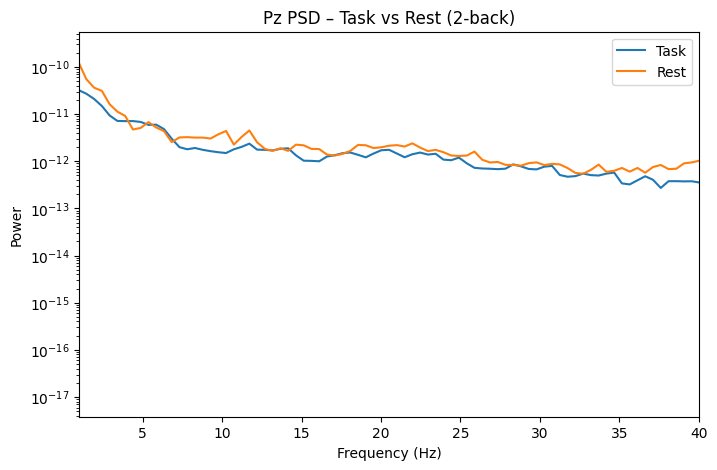

In [ ]:
from scipy.signal import welch

def band_power(x, sfreq):
    f, pxx = welch(x, fs=sfreq, nperseg=2048)
    return f, pxx

f_t, p_task = band_power(task_eeg[ch], sfreq)
f_r, p_rest = band_power(rest_eeg[ch], sfreq)

plt.figure(figsize=(8,5))
plt.semilogy(f_t, p_task, label="Task")
plt.semilogy(f_r, p_rest, label="Rest")
plt.xlim(1, 40)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title(f"Pz PSD – Task vs Rest ({label})")
plt.legend()
plt.show()

In [ ]:
X   # shape: (n_windows, n_channels, n_samples)
y   # labels: '0-back', '2-back', '3-back'

['2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '2-back',
 '0-back',
 '0-back',
 '0-back',
 '0-back',
 '0-back',
 '0-back',
 '0-back',
 '0-back',
 '0-back',
 '0-back',
 '0-back',
 '0-back',

In [ ]:
ch = raw.ch_names.index("Pz")
sfreq = raw.info["sfreq"]

In [ ]:
rest_windows = []

for i in range(len(block_events) - 1):
    block_start, _ = block_events[i]
    next_block_start, _ = block_events[i + 1]

    # find stimuli in this block
    stim_events = events[
        (events[:,0] > block_start) &
        (events[:,0] < next_block_start) &
        (np.isin(events[:,2], list(stim_codes)))
    ]

    if len(stim_events) == 0:
        continue

    rest_start = stim_events[-1, 0]
    rest_end   = next_block_start

    rest_data = raw.get_data(start=rest_start, stop=rest_end)

    n_samples = rest_data.shape[1]

    for i in range(0, n_samples - win_len + 1, step):
        rest_windows.append(rest_data[ch, i:i+win_len])

In [ ]:
import numpy as np
rest_windows = np.array(rest_windows)

In [ ]:
from scipy.signal import welch

def alpha_log_power(x, sfreq):
    f, pxx = welch(x, fs=sfreq, nperseg=win_len)
    alpha = (f >= 8) & (f <= 12)
    return np.log(np.mean(pxx[alpha]))

In [ ]:
task_alpha = np.array([
    alpha_log_power(window[ch], sfreq)
    for window in X
])

In [ ]:
rest_alpha = np.array([
    alpha_log_power(window, sfreq)
    for window in rest_windows
])

/tmp/ipython-input-4217927709.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([task_alpha, rest_alpha], labels=["Task", "Rest"])


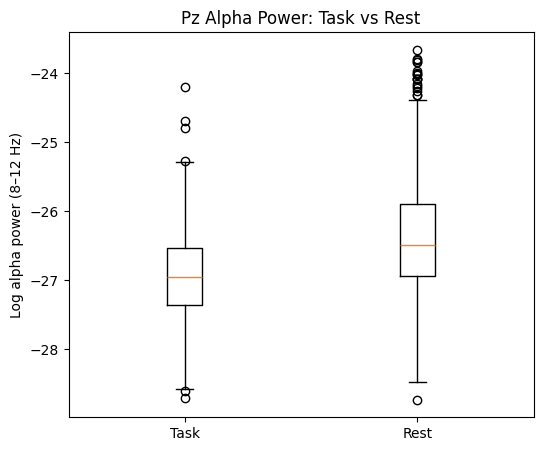

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.boxplot([task_alpha, rest_alpha], labels=["Task", "Rest"])
plt.ylabel("Log alpha power (8–12 Hz)")
plt.title("Pz Alpha Power: Task vs Rest")
plt.show()

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(task_alpha, rest_alpha)

TtestResult(statistic=np.float64(-12.73278356827681), pvalue=np.float64(8.927724789531246e-35), df=np.float64(1117.0))

In [ ]:
import numpy as np
from scipy.signal import welch

sfreq = raw.info["sfreq"]
ch = raw.ch_names.index("Pz")

def alpha_log_power(x, sfreq):
    f, pxx = welch(x, fs=sfreq, nperseg=win_len)
    alpha = (f >= 8) & (f <= 12)
    return np.log(np.mean(pxx[alpha]))

alpha_by_window = np.array([
    alpha_log_power(window[ch], sfreq)
    for window in X
])

In [ ]:
labels = np.array(y)

alpha_0 = alpha_by_window[labels == "0-back"]
alpha_2 = alpha_by_window[labels == "2-back"]
alpha_3 = alpha_by_window[labels == "3-back"]

In [ ]:
len(alpha_0), len(alpha_2), len(alpha_3)

(237, 237, 237)

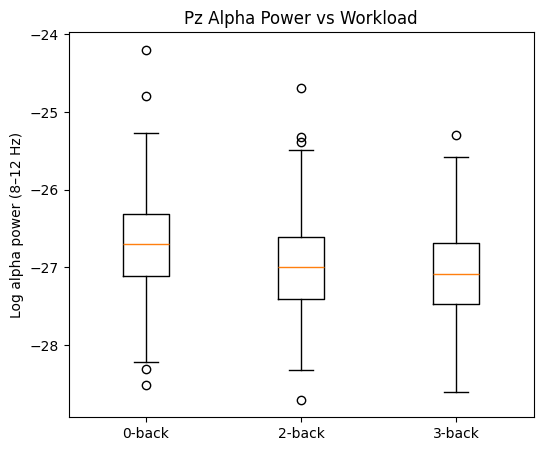

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.boxplot(
    [alpha_0, alpha_2, alpha_3],
    tick_labels=["0-back", "2-back", "3-back"]
)
plt.ylabel("Log alpha power (8–12 Hz)")
plt.title("Pz Alpha Power vs Workload")
plt.show()

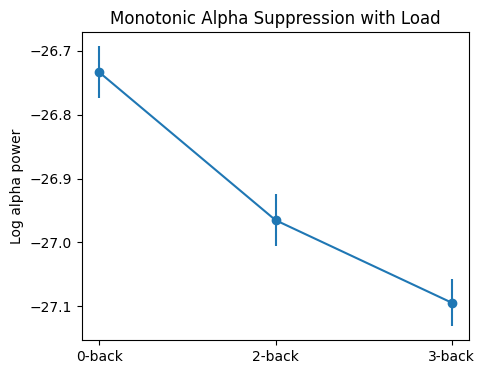

In [ ]:
means = [alpha_0.mean(), alpha_2.mean(), alpha_3.mean()]
sems  = [
    alpha_0.std()/np.sqrt(len(alpha_0)),
    alpha_2.std()/np.sqrt(len(alpha_2)),
    alpha_3.std()/np.sqrt(len(alpha_3))
]

plt.figure(figsize=(5,4))
plt.errorbar([0,1,2], means, yerr=sems, fmt='o-')
plt.xticks([0,1,2], ["0-back", "2-back", "3-back"])
plt.ylabel("Log alpha power")
plt.title("Monotonic Alpha Suppression with Load")
plt.show()


In [ ]:
from scipy.stats import ttest_ind

print("0 vs 2:", ttest_ind(alpha_0, alpha_2))
print("2 vs 3:", ttest_ind(alpha_2, alpha_3))
print("0 vs 3:", ttest_ind(alpha_0, alpha_3))

0 vs 2: TtestResult(statistic=np.float64(4.025578366748851), pvalue=np.float64(6.619988338535058e-05), df=np.float64(472.0))
2 vs 3: TtestResult(statistic=np.float64(2.3587425878871335), pvalue=np.float64(0.0187435929238784), df=np.float64(472.0))
0 vs 3: TtestResult(statistic=np.float64(6.52987279042862), pvalue=np.float64(1.7045226385880834e-10), df=np.float64(472.0))


In [ ]:
np.polyfit([0]*len(alpha_0) + [2]*len(alpha_2) + [3]*len(alpha_3),
           np.concatenate([alpha_0, alpha_2, alpha_3]), 1)

array([ -0.1195594 , -26.73179124])

In [ ]:
# pick frontal control channel (priority order)
for cand in ["F3", "F4", "AFz", "Fp1", "Fp2"]:
    if cand in raw.ch_names:
        ch_f = raw.ch_names.index(cand)
        print("Using frontal channel:", cand)
        break
else:
    raise ValueError("No suitable frontal channel found.")

Using frontal channel: AFz


In [ ]:
# choose best available frontal control channel
for cand in ["FC1", "FC2", "AFz", "F1", "F2", "Cz"]:
    if cand in raw.ch_names:
        ch_f = raw.ch_names.index(cand)
        print("Using frontal/control channel:", cand)
        break
else:
    raise ValueError("No frontal/control channel found.")

Using frontal/control channel: FC1


In [ ]:
from scipy.signal import welch
import numpy as np

def theta_log_power(x, sfreq):
    f, pxx = welch(x, fs=sfreq, nperseg=win_len)
    theta = (f >= 4) & (f <= 7)
    return np.log(np.mean(pxx[theta]))

In [ ]:
theta_by_window = np.array([
    theta_log_power(window[ch_f], sfreq)
    for window in X
])

In [ ]:
theta_by_window.shape, len(X)

((711,), 711)

In [ ]:
labels = np.array(y)


In [ ]:
theta_0 = theta_by_window[labels == "0-back"]
theta_2 = theta_by_window[labels == "2-back"]
theta_3 = theta_by_window[labels == "3-back"]

In [ ]:
len(theta_0), len(theta_2), len(theta_3)

(237, 237, 237)

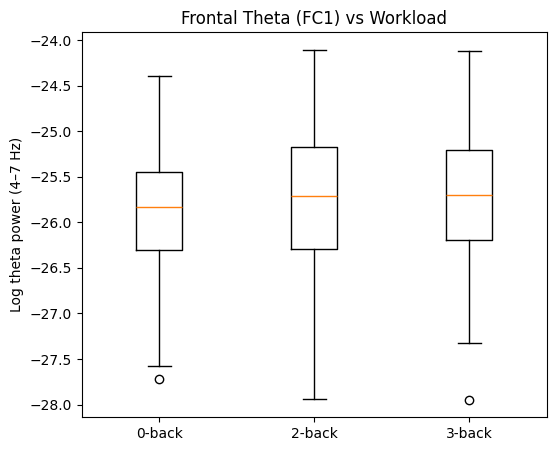

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.boxplot(
    [theta_0, theta_2, theta_3],
    tick_labels=["0-back", "2-back", "3-back"]
)
plt.ylabel("Log theta power (4–7 Hz)")
plt.title("Frontal Theta (FC1) vs Workload")
plt.show()

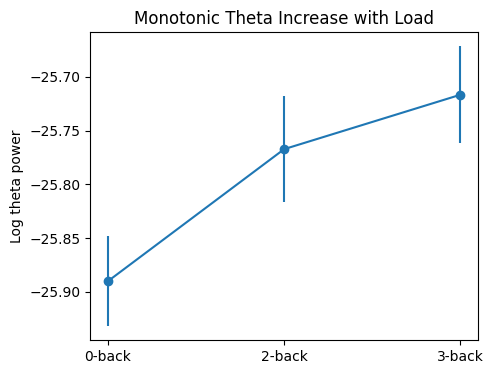

In [ ]:
means = [theta_0.mean(), theta_2.mean(), theta_3.mean()]
sems  = [
    theta_0.std()/np.sqrt(len(theta_0)),
    theta_2.std()/np.sqrt(len(theta_2)),
    theta_3.std()/np.sqrt(len(theta_3))
]

plt.figure(figsize=(5,4))
plt.errorbar([0,1,2], means, yerr=sems, fmt='o-')
plt.xticks([0,1,2], ["0-back", "2-back", "3-back"])
plt.ylabel("Log theta power")
plt.title("Monotonic Theta Increase with Load")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

for lbl, color in zip(["0-back", "2-back", "3-back"], ["green", "orange", "red"]):
    idx = labels == lbl
    plt.scatter(
        alpha[idx],
        theta[idx],
        alpha=0.5,
        label=lbl
    )

plt.xlabel("Log alpha power (Pz, 8–12 Hz)")
plt.ylabel("Log theta power (FC1, 4–7 Hz)")
plt.title("Alpha–Theta Feature Space (Workload)")
plt.legend()
plt.show()

NameError: name 'alpha' is not defined

<Figure size 600x500 with 0 Axes>

In [ ]:
alpha = alpha_by_window
theta = theta_by_window

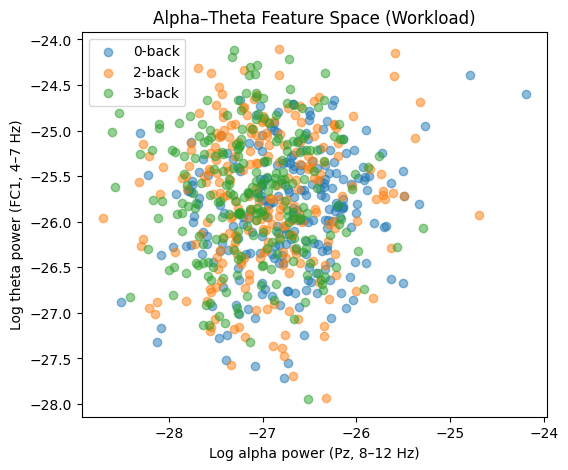

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

for lbl in ["0-back", "2-back", "3-back"]:
    idx = labels == lbl
    plt.scatter(
        alpha[idx],
        theta[idx],
        alpha=0.5,
        label=lbl
    )

plt.xlabel("Log alpha power (Pz, 8–12 Hz)")
plt.ylabel("Log theta power (FC1, 4–7 Hz)")
plt.title("Alpha–Theta Feature Space (Workload)")
plt.legend()
plt.show()


In [ ]:
blocks = [
    (start, end, label)
    for start, end, label in task_segments
]

In [ ]:
window_blocks = []

In [ ]:
for (w_start, w_end) in meta:
    for bi, (b_start, b_end, label) in enumerate(blocks):
        if (w_start >= b_start) and (w_end <= b_end):
            window_blocks.append(bi)
            break

In [ ]:

window_blocks = np.array(window_blocks)

In [ ]:
block_alpha = []
block_theta = []
block_labels = []


In [ ]:
for bi, (_, _, label) in enumerate(blocks):
    idx = window_blocks == bi

    block_alpha.append(alpha_by_window[idx].mean())
    block_theta.append(theta_by_window[idx].mean())
    block_labels.append(label)

In [ ]:
block_alpha = np.array(block_alpha)
block_theta = np.array(block_theta)
block_labels = np.array(block_labels)

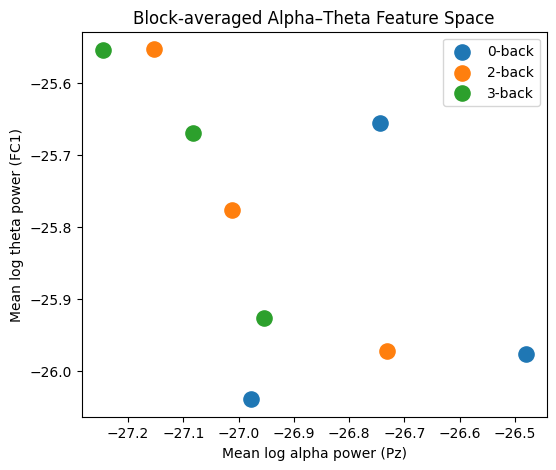

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

for lbl in ["0-back", "2-back", "3-back"]:
    idx = block_labels == lbl
    plt.scatter(
        block_alpha[idx],
        block_theta[idx],
        s=120,
        label=lbl
    )

plt.xlabel("Mean log alpha power (Pz)")
plt.ylabel("Mean log theta power (FC1)")
plt.title("Block-averaged Alpha–Theta Feature Space")
plt.legend()
plt.show()

In [ ]:
posterior = ["P3", "Pz", "P4", "POz", "O1", "O2"]

In [ ]:
frontal = ["AFz", "FC1", "FC2", "Cz", "F1", "F2"]

In [ ]:
posterior = ["P3", "Pz", "P4", "POz", "O1", "O2"]
frontal   = ["AFz", "FC1", "FC2", "Cz", "F1", "F2"]

post_idx  = [raw.ch_names.index(ch) for ch in posterior]
front_idx = [raw.ch_names.index(ch) for ch in frontal]

In [ ]:
from scipy.signal import welch
import numpy as np

def band_log_power(x, sfreq, fmin, fmax):
    f, pxx = welch(x, fs=sfreq, nperseg=win_len)
    band = (f >= fmin) & (f <= fmax)
    return np.log(np.mean(pxx[band]))

In [ ]:
window_features = []

for window in X:
    alpha_feats = [
        band_log_power(window[ch], sfreq, 8, 12)
        for ch in post_idx
    ]
    theta_feats = [
        band_log_power(window[ch], sfreq, 4, 7)
        for ch in front_idx
    ]
    window_features.append(alpha_feats + theta_feats)

window_features = np.array(window_features)

In [ ]:
block_features = []
block_labels   = []

for bi, (_, _, label) in enumerate(task_segments):
    idx = window_blocks == bi
    block_features.append(window_features[idx].mean(axis=0))
    block_labels.append(label)

block_features = np.array(block_features)
block_labels   = np.array(block_labels)


In [ ]:
block_features.shape, block_labels

((9, 12),
 array(['2-back', '0-back', '3-back', '0-back', '3-back', '2-back',
        '3-back', '2-back', '0-back'], dtype='<U6'))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(block_features, block_labels)

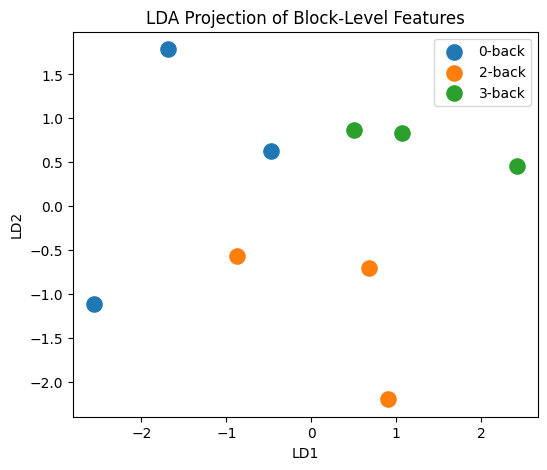

In [ ]:
plt.figure(figsize=(6,5))
for lbl in ["0-back", "2-back", "3-back"]:
    idx = block_labels == lbl
    plt.scatter(X_lda[idx, 0], X_lda[idx, 1], s=120, label=lbl)

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Projection of Block-Level Features")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# LDA weight matrix
W = lda.scalings_   # shape: (n_features, n_components)

W.shape

(12, 2)

In [ ]:
feature_names = [
    "α_P3", "α_Pz", "α_P4", "α_POz", "α_O1", "α_O2",
    "θ_AFz", "θ_FC1", "θ_FC2", "θ_Cz", "θ_F1", "θ_F2"
]

In [ ]:
weights_df = pd.DataFrame(
    W,
    index=feature_names,
    columns=["LD1", "LD2"]
)

In [ ]:
weights_df

,LD1,LD2
α_P3,8.227490,12.450505
α_Pz,-13.201019,-6.254947
α_P4,0.390294,-15.356129
α_POz,1.929146,4.188086
α_O1,13.808968,8.238545
α_O2,-12.539171,-9.696358
θ_AFz,-2.587283,0.017959
θ_FC1,1.578321,4.324047
θ_FC2,0.668217,-6.481166
θ_Cz,16.637901,1.684856


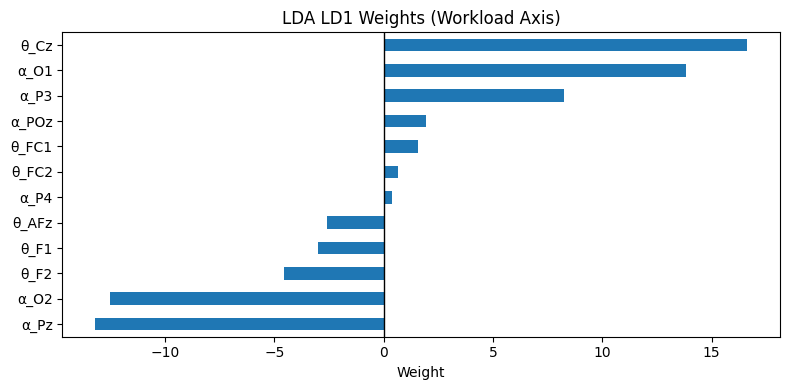

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
weights_df["LD1"].sort_values().plot(kind="barh")
plt.axvline(0, color="k", linewidth=1)
plt.title("LDA LD1 Weights (Workload Axis)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [ ]:
# LD1 weight vector
w = lda.scalings_[:, 0]   # shape (n_features,)

In [ ]:

# Workload index per block
workload_index = block_features @ w

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "workload": workload_index,
    "label": block_labels
})


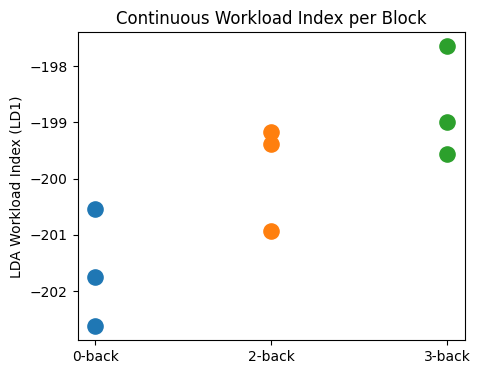

In [ ]:
plt.figure(figsize=(5,4))
for lbl in ["0-back", "2-back", "3-back"]:
    vals = df[df.label == lbl].workload
    plt.scatter([lbl]*len(vals), vals, s=120)

plt.ylabel("LDA Workload Index (LD1)")
plt.title("Continuous Workload Index per Block")
plt.show()

In [ ]:
df.groupby("label").workload.mean()

,workload
label,
0-back,-201.638957
2-back,-199.832021
3-back,-198.735198


In [ ]:
# shape: (n_windows, 12)
window_features

array([[-27.94089195, -27.50995515, -26.3743072 , ..., -27.73397159,
        -26.77310942, -27.13183025],
       [-27.28434502, -27.33579052, -26.67650673, ..., -27.52838247,
        -27.55419981, -27.5787899 ],
       [-27.82371474, -27.58953977, -26.34208955, ..., -26.00503502,
        -25.83971461, -25.76712951],
       ...,
       [-27.65329072, -27.68296689, -27.04841875, ..., -25.52660789,
        -25.77817843, -25.78024634],
       [-27.81179765, -27.92676116, -27.50711793, ..., -25.7240533 ,
        -25.39224334, -25.51305802],
       [-27.10948052, -26.28206098, -26.1750263 , ..., -25.74773512,
        -24.68925878, -24.85851151]])

In [ ]:
# LD1 weight vector from block-level LDA
w = lda.scalings_[:, 0]   # shape (12,)

In [ ]:
# Window-level workload index
window_workload = window_features @ w

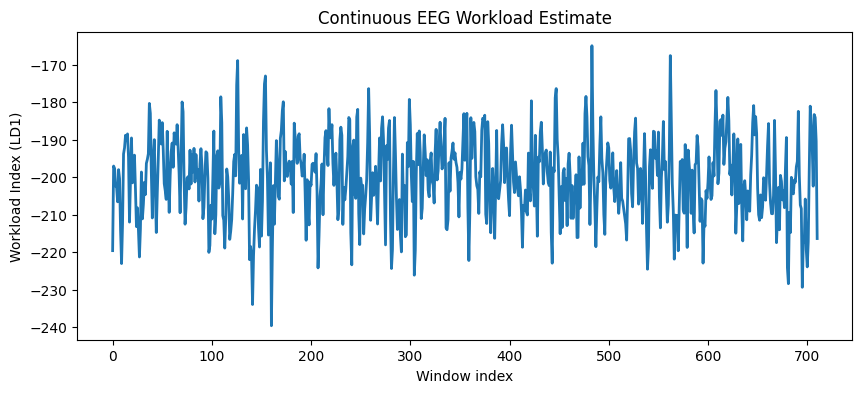

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(window_workload, linewidth=2)
plt.ylabel("Workload Index (LD1)")
plt.xlabel("Window index")
plt.title("Continuous EEG Workload Estimate")
plt.show()

In [ ]:
def ema(x, alpha=0.05):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i-1]
    return y

window_workload_smooth = ema(window_workload, alpha=0.03)

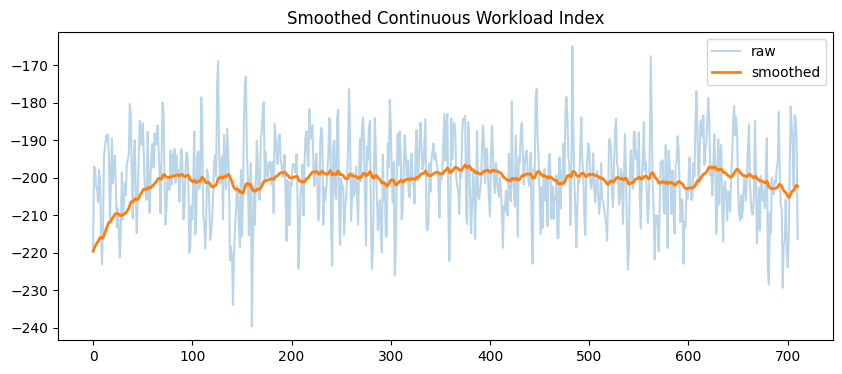

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(window_workload, alpha=0.3, label="raw")
plt.plot(window_workload_smooth, linewidth=2, label="smoothed")
plt.legend()
plt.title("Smoothed Continuous Workload Index")
plt.show()

In [ ]:
# project window-level features into LDA space
X_window_lda = lda.transform(window_features)

# LD1 = continuous workload index
workload = X_window_lda[:, 0]

In [ ]:
def ema(x, alpha=0.05):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i-1]
    return y

workload_smooth = ema(workload, alpha=0.05)

In [ ]:
window_times = np.array([start for start, _ in meta]) / sfreq

In [ ]:
block_times = [(start / sfreq, label) for start, _, label in task_segments]

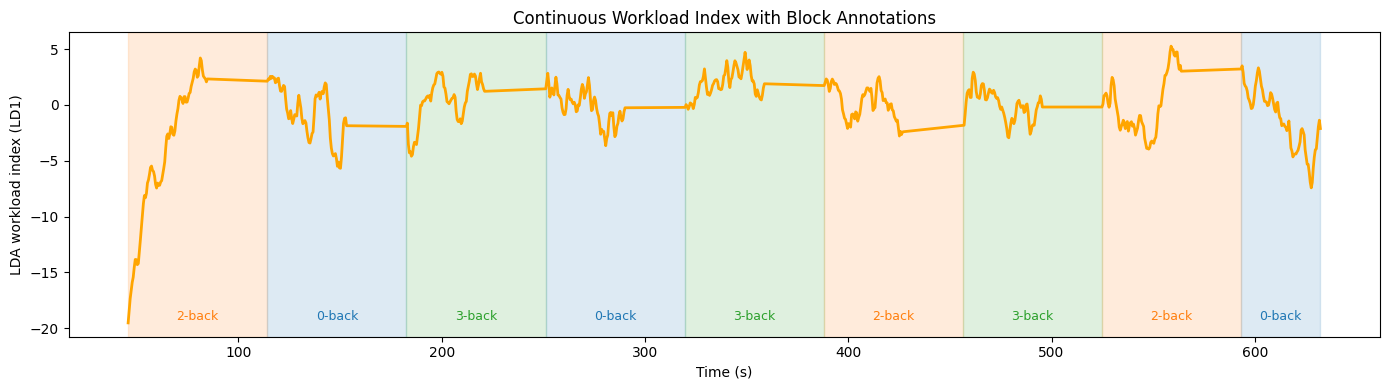

In [ ]:
plt.figure(figsize=(14,4))

plt.plot(window_times, workload_smooth,
         color="orange", linewidth=2, label="Workload (LD1, smoothed)")

colors = {
    "0-back": "tab:blue",
    "2-back": "tab:orange",
    "3-back": "tab:green"
}

for i, (t_start, lbl) in enumerate(block_times):
    if i < len(block_times) - 1:
        t_end = block_times[i+1][0]
    else:
        t_end = window_times[-1]

    plt.axvspan(t_start, t_end, color=colors[lbl], alpha=0.15)

    plt.text(
        (t_start + t_end) / 2,
        np.min(workload_smooth),
        lbl,
        ha="center",
        va="bottom",
        fontsize=9,
        color=colors[lbl]
    )

plt.xlabel("Time (s)")
plt.ylabel("LDA workload index (LD1)")
plt.title("Continuous Workload Index with Block Annotations")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(
        ((nx - 1)*np.var(x, ddof=1) + (ny - 1)*np.var(y, ddof=1)) / (nx + ny - 2)
    )
    return (np.mean(y) - np.mean(x)) / pooled_std

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

block_features = np.array(block_features)
block_labels   = np.array(block_labels)   # 🔴 THIS WAS MISSING

loo = LeaveOneOut()
y_true, y_pred = [], []

In [ ]:
block_features = []
block_labels = []

for bi, (start, end, label) in enumerate(task_segments):
    idx = (window_blocks == bi)

    if idx.sum() == 0:
        print(f"⚠️ No windows for block {bi}")
        continue

    # aggregate features
    block_features.append(window_features[idx].mean(axis=0))

    # 🔴 THIS LINE IS REQUIRED
    block_labels.append(label)

block_features = np.array(block_features)
block_labels = np.array(block_labels)

print("block_features:", block_features.shape)
print("block_labels:", block_labels.shape)
print("labels:", block_labels)

block_features: (9, 12)
block_labels: (9,)
labels: ['2-back' '0-back' '3-back' '0-back' '3-back' '2-back' '3-back' '2-back'
 '0-back']


In [ ]:
assert block_features.shape[0] == block_labels.shape[0]

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

loo = LeaveOneOut()
y_true, y_pred = [], []

for train, test in loo.split(block_features):
    clf = LinearDiscriminantAnalysis()
    clf.fit(block_features[train], block_labels[train])
    y_pred.append(clf.predict(block_features[test])[0])
    y_true.append(block_labels[test][0])

print("LOO accuracy:", accuracy_score(y_true, y_pred))
print("Pred:", y_pred)
print("True:", y_true)

LOO accuracy: 0.2222222222222222
Pred: [np.str_('3-back'), np.str_('0-back'), np.str_('3-back'), np.str_('3-back'), np.str_('2-back'), np.str_('3-back'), np.str_('0-back'), np.str_('0-back'), np.str_('2-back')]
True: [np.str_('2-back'), np.str_('0-back'), np.str_('3-back'), np.str_('0-back'), np.str_('3-back'), np.str_('2-back'), np.str_('3-back'), np.str_('2-back'), np.str_('0-back')]


In [ ]:
window_features   # shape (n_windows, 12)

array([[-27.94089195, -27.50995515, -26.3743072 , ..., -27.73397159,
        -26.77310942, -27.13183025],
       [-27.28434502, -27.33579052, -26.67650673, ..., -27.52838247,
        -27.55419981, -27.5787899 ],
       [-27.82371474, -27.58953977, -26.34208955, ..., -26.00503502,
        -25.83971461, -25.76712951],
       ...,
       [-27.65329072, -27.68296689, -27.04841875, ..., -25.52660789,
        -25.77817843, -25.78024634],
       [-27.81179765, -27.92676116, -27.50711793, ..., -25.7240533 ,
        -25.39224334, -25.51305802],
       [-27.10948052, -26.28206098, -26.1750263 , ..., -25.74773512,
        -24.68925878, -24.85851151]])

In [ ]:
window_blocks     # shape (n_windows,)  → block index per window

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
block_labels      # shape (n_blocks,)   → "0-back", "2-back", "3-back"

array(['2-back', '0-back', '3-back', '0-back', '3-back', '2-back',
       '3-back', '2-back', '0-back'], dtype='<U6')

In [ ]:
label_to_y = {
    "0-back": 0.0,
    "2-back": 2.0,
    "3-back": 3.0
}


In [ ]:
# window-level ordinal targets
y_window = np.array([label_to_y[block_labels[b]] for b in window_blocks])

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import numpy as np

unique_blocks = np.unique(window_blocks)

In [ ]:
y_true_all = []
y_pred_all = []

for test_block in unique_blocks:
    train_idx = window_blocks != test_block
    test_idx  = window_blocks == test_block

    X_train = window_features[train_idx]
    y_train = y_window[train_idx]

    X_test  = window_features[test_idx]
    y_test  = y_window[test_idx]

    # simple, stable teacher
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_true_all.append(y_test)
    y_pred_all.append(y_pred)


In [ ]:
y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)

In [ ]:
rho, p = spearmanr(y_true_all, y_pred_all)

In [ ]:
print("Spearman rho:", rho)

Spearman rho: -0.12656907920149083


In [ ]:
print("R²:", r2_score(y_true_all, y_pred_all))

R²: -0.20777794118471293


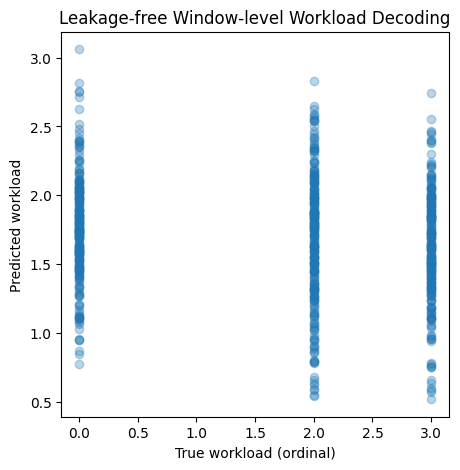

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y_true_all, y_pred_all, alpha=0.3)
plt.xlabel("True workload (ordinal)")
plt.ylabel("Predicted workload")
plt.title("Leakage-free Window-level Workload Decoding")
plt.show()

In [ ]:
import numpy as np
from collections import Counter

# Ensure these are numpy arrays
window_features = np.asarray(window_features)
window_blocks   = np.asarray(window_blocks)
y_win_str       = np.asarray(y)   # <-- IMPORTANT: window-level string labels

In [ ]:
print("window_features:", window_features.shape)
print("window_blocks:", window_blocks.shape)
print("y (window labels):", y_win_str.shape)
print("label counts:", Counter(y_win_str))


window_features: (711, 12)
window_blocks: (711,)
y (window labels): (711,)
label counts: Counter({np.str_('2-back'): 237, np.str_('0-back'): 237, np.str_('3-back'): 237})


In [ ]:

assert len(window_features) == len(window_blocks) == len(y_win_str), "Mismatch! windows not aligned."


In [ ]:
for b in np.unique(window_blocks):
    labs = np.unique(y_win_str[window_blocks == b])
    print("block", b, "labels:", labs)

block 0 labels: ['2-back']
block 1 labels: ['0-back']
block 2 labels: ['3-back']
block 3 labels: ['0-back']
block 4 labels: ['3-back']
block 5 labels: ['2-back']
block 6 labels: ['3-back']
block 7 labels: ['2-back']
block 8 labels: ['0-back']


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import numpy as np

In [ ]:
label_to_y = {"0-back": 0.0, "2-back": 2.0, "3-back": 3.0}

In [ ]:
y_window = np.array([label_to_y[s] for s in y_win_str], dtype=float)

In [ ]:

unique_blocks = np.unique(window_blocks)

y_true_all = []
y_pred_all = []


In [ ]:
for test_block in unique_blocks:
    train_idx = window_blocks != test_block
    test_idx  = window_blocks == test_block

    X_train = window_features[train_idx]
    y_train = y_window[train_idx]
    X_test  = window_features[test_idx]
    y_test  = y_window[test_idx]

    # scaling matters because your 12 features have different ranges/variances
    model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true_all.append(y_test)
    y_pred_all.append(y_pred)

In [ ]:
y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)


In [ ]:

rho, _ = spearmanr(y_true_all, y_pred_all)

In [ ]:
print("Spearman rho:", rho)

Spearman rho: -0.1267117537155433


In [ ]:
print("R²:", r2_score(y_true_all, y_pred_all))

R²: -0.2101099618429516


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    "block": window_blocks,
    "true_lbl": y_win_str,
    "true_y": y_window,
})


In [ ]:
print(df.groupby("true_lbl").true_y.mean())  # should print 0,2,3 exactly
print(df.groupby("block").true_lbl.first())  # each block label

true_lbl
0-back    0.0
2-back    2.0
3-back    3.0
Name: true_y, dtype: float64
block
0    2-back
1    0-back
2    3-back
3    0-back
4    3-back
5    2-back
6    3-back
7    2-back
8    0-back
Name: true_lbl, dtype: object


In [ ]:
# =========================
# Leakage-free workload decoder (block-trained teacher -> window workload index)
# =========================
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

In [ ]:
# ---------- Sanity checks ----------
window_features = np.asarray(window_features)
window_blocks   = np.asarray(window_blocks)
y_win_str       = np.asarray(y_win_str)

In [ ]:
print("window_features:", window_features.shape)
print("window_blocks  :", window_blocks.shape)
print("y_win_str      :", y_win_str.shape)
print("label counts   :", Counter(y_win_str))

assert len(window_features) == len(window_blocks) == len(y_win_str), "Mismatch: windows not aligned."


window_features: (711, 12)
window_blocks  : (711,)
y_win_str      : (711,)
label counts   : Counter({np.str_('2-back'): 237, np.str_('0-back'): 237, np.str_('3-back'): 237})


In [ ]:
# Each block should have exactly one label (you already checked, but keep it)
for b in np.unique(window_blocks):
    labs = np.unique(y_win_str[window_blocks == b])
    if len(labs) != 1:
        raise ValueError(f"Block {b} has multiple labels: {labs}")
print("✅ Each block has a single label.")


✅ Each block has a single label.


In [ ]:

# ============================================================
# Part A) TRUE "decoding": leakage-free WINDOW-LEVEL CLASSIFICATION
#        Train on windows from 8 blocks, test on windows from 1 held-out block
# ============================================================
logo = LeaveOneGroupOut()

clf = make_pipeline(
    StandardScaler(),
    LinearDiscriminantAnalysis()  # for 3-class classification
)

In [ ]:

y_true_all = []
y_pred_all = []
test_block_list = []

In [ ]:
for train_idx, test_idx in logo.split(window_features, y_win_str, groups=window_blocks):
    clf.fit(window_features[train_idx], y_win_str[train_idx])
    y_pred = clf.predict(window_features[test_idx])

    y_true_all.append(y_win_str[test_idx])
    y_pred_all.append(y_pred)

    test_block = int(np.unique(window_blocks[test_idx])[0])
    test_block_list.append(test_block)


In [ ]:
y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)

In [ ]:
acc = accuracy_score(y_true_all, y_pred_all)
print("\n==== Leakage-free window-level classification (Leave-One-Block-Out) ====")
print("Accuracy:", acc)
print("Confusion matrix (rows=true, cols=pred):\n", confusion_matrix(y_true_all, y_pred_all, labels=["0-back","2-back","3-back"]))
print("\n", classification_report(y_true_all, y_pred_all))


==== Leakage-free window-level classification (Leave-One-Block-Out) ====
Accuracy: 0.12939521800281295
Confusion matrix (rows=true, cols=pred):
 [[ 55  95  87]
 [ 95  11 131]
 [ 74 137  26]]

               precision    recall  f1-score   support

      0-back       0.25      0.23      0.24       237
      2-back       0.05      0.05      0.05       237
      3-back       0.11      0.11      0.11       237

    accuracy                           0.13       711
   macro avg       0.13      0.13      0.13       711
weighted avg       0.13      0.13      0.13       711



In [ ]:
# --- Build block-level features by averaging window_features within each block ---
unique_blocks = np.unique(window_blocks)

block_features = []
block_labels   = []
for b in unique_blocks:
    idx = (window_blocks == b)
    block_features.append(window_features[idx].mean(axis=0))
    block_labels.append(np.unique(y_win_str[idx])[0])

block_features = np.asarray(block_features)           # (9, n_features)
block_labels   = np.asarray(block_labels)             # (9,)
print("\nblock_features:", block_features.shape)
print("block_labels  :", block_labels.shape, block_labels)


block_features: (9, 12)
block_labels  : (9,) ['2-back' '0-back' '3-back' '0-back' '3-back' '2-back' '3-back' '2-back'
 '0-back']


In [ ]:
loo_pred = []
loo_true = []
for i in range(len(block_features)):
    train = np.arange(len(block_features)) != i
    test  = np.arange(len(block_features)) == i

    block_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
    block_clf.fit(block_features[train], block_labels[train])
    loo_pred.append(block_clf.predict(block_features[test])[0])
    loo_true.append(block_labels[test][0])

In [ ]:
print("\n==== Block-level LOO decoding (9 blocks) ====")
print("Accuracy:", accuracy_score(loo_true, loo_pred))
print("Pred:", loo_pred)
print("True:", list(loo_true))


==== Block-level LOO decoding (9 blocks) ====
Accuracy: 0.2222222222222222
Pred: [np.str_('3-back'), np.str_('0-back'), np.str_('3-back'), np.str_('3-back'), np.str_('2-back'), np.str_('3-back'), np.str_('0-back'), np.str_('0-back'), np.str_('2-back')]
True: [np.str_('2-back'), np.str_('0-back'), np.str_('3-back'), np.str_('0-back'), np.str_('3-back'), np.str_('2-back'), np.str_('3-back'), np.str_('2-back'), np.str_('0-back')]


In [ ]:
# --- Fit FINAL teacher on ALL blocks to get a stable LD1 axis ---
teacher = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
teacher.fit(block_features, block_labels)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [ ]:
# Extract the LDA model and its scalings on standardized space
lda = teacher.named_steps["lineardiscriminantanalysis"]
scaler = teacher.named_steps["standardscaler"]

In [ ]:

# To project new windows consistently:
# 1) standardize with same scaler
# 2) dot with LD1 direction
w_ld1 = lda.scalings_[:, 0]  # (n_features,)

Xw_z = scaler.transform(window_features)
workload_raw = Xw_z @ w_ld1  # continuous workload index per window


In [ ]:
# Optional smoothing (EMA)
def ema(x, alpha=0.05):
    x = np.asarray(x, dtype=float)
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i-1]
    return y


In [ ]:
workload_smooth = ema(workload_raw, alpha=0.05)

# --- Check monotonicity at BLOCK LEVEL using the continuous index ---
dfw = pd.DataFrame({
    "block": window_blocks,
    "label": y_win_str,
    "workload": workload_raw,
})


In [ ]:

block_means = dfw.groupby("block").agg(
    label=("label", "first"),
    mean_workload=("workload", "mean"),
    std_workload=("workload", "std"),
    n=("workload", "count"),
).reset_index()

In [ ]:
print("\n==== Workload index sanity (block means) ====")
print(block_means.sort_values("mean_workload"))


==== Workload index sanity (block means) ====
   block   label  mean_workload  std_workload   n
8      8  0-back      -2.557361     11.293660  79
1      1  0-back      -1.684528     12.369537  79
5      5  2-back      -0.871071      9.084911  79
3      3  0-back      -0.468806     11.850191  79
6      6  3-back       0.505589     10.200569  79
7      7  2-back       0.680413     10.832490  79
0      0  2-back       0.900772      9.777255  79
2      2  3-back       1.074397      9.927857  79
4      4  3-back       2.420595      9.241521  79


In [ ]:
label_order = {"0-back": 0, "2-back": 2, "3-back": 3}
block_means["ordinal"] = block_means["label"].map(label_order)


In [ ]:
# Spearman on 9 block means (correct scale)
from scipy.stats import spearmanr
rho, p = spearmanr(block_means["ordinal"], block_means["mean_workload"])
print(f"\nSpearman rho on BLOCK MEANS (ordinal vs mean_workload): {rho:.3f} (p={p:.3g})")


Spearman rho on BLOCK MEANS (ordinal vs mean_workload): 0.791 (p=0.0112)


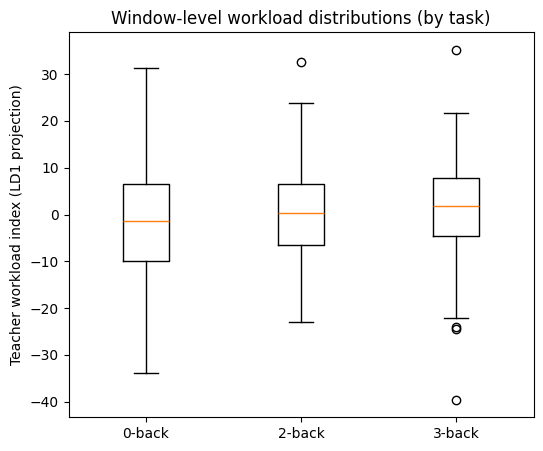

In [ ]:
# 1) Distribution of workload by class (windows)
plt.figure(figsize=(6,5))
data = [
    workload_raw[y_win_str=="0-back"],
    workload_raw[y_win_str=="2-back"],
    workload_raw[y_win_str=="3-back"],
]
plt.boxplot(data, tick_labels=["0-back","2-back","3-back"])
plt.ylabel("Teacher workload index (LD1 projection)")
plt.title("Window-level workload distributions (by task)")
plt.show()


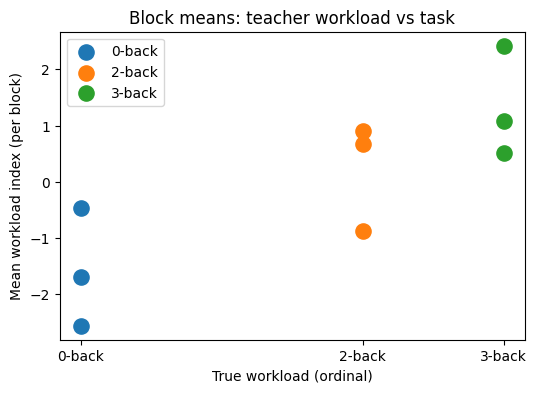

In [ ]:
# 2) Block means scatter
plt.figure(figsize=(6,4))
for lbl in ["0-back","2-back","3-back"]:
    sub = block_means[block_means["label"]==lbl]
    plt.scatter(sub["ordinal"], sub["mean_workload"], label=lbl, s=120)
plt.xticks([0,2,3], ["0-back","2-back","3-back"])
plt.xlabel("True workload (ordinal)")
plt.ylabel("Mean workload index (per block)")
plt.title("Block means: teacher workload vs task")
plt.legend()
plt.show()

In [ ]:

# 3) Continuous workload over time with block shading
# window_times from meta (start sample / sfreq)
window_times = np.array([start for (start, _) in meta], dtype=float) / float(sfreq)


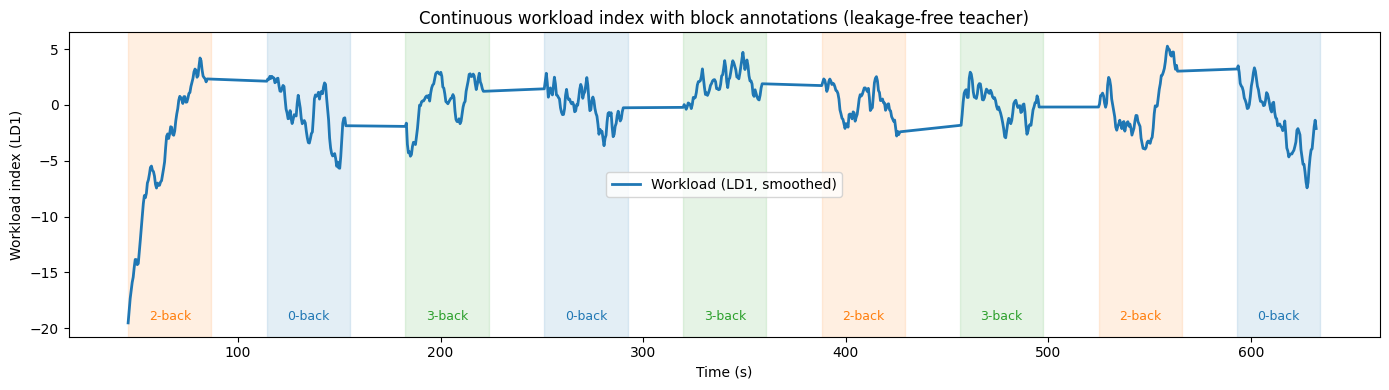

In [ ]:
window_times = np.array([start for (start, _) in meta], dtype=float) / float(sfreq)

plt.figure(figsize=(14,4))
plt.plot(window_times, workload_smooth, linewidth=2, label="Workload (LD1, smoothed)")

# Shade blocks using task_segments
colors = {"0-back":"tab:blue", "2-back":"tab:orange", "3-back":"tab:green"}
for i, (b_start, b_end, lbl) in enumerate(task_segments):
    t0 = b_start / float(sfreq)
    t1 = b_end   / float(sfreq)
    plt.axvspan(t0, t1, alpha=0.12, color=colors.get(lbl, "gray"))
    plt.text((t0+t1)/2, np.min(workload_smooth), lbl, ha="center", va="bottom", fontsize=9, color=colors.get(lbl, "black"))

plt.xlabel("Time (s)")
plt.ylabel("Workload index (LD1)")
plt.title("Continuous workload index with block annotations (leakage-free teacher)")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# ============================================================
# Part D) If you want the "student" target now:
#   student_target = workload_raw (or smooth) per window
# and later you train a single-electrode model to predict that.
# ============================================================

student_target = workload_raw  # or workload_smooth
print("\nstudent_target shape:", student_target.shape)


student_target shape: (711,)


In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix

X_block = block_features          # (n_blocks, n_features)
y_block = block_labels            # strings: '0-back','2-back','3-back'

loo = LeaveOneOut()

y_true = []
y_pred = []

for train, test in loo.split(X_block):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_block[train], y_block[train])

    pred = lda.predict(X_block[test])[0]

    y_true.append(y_block[test][0])
    y_pred.append(pred)

print("Block-level LOO accuracy:", accuracy_score(y_true, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_true, y_pred))

Block-level LOO accuracy: 0.2222222222222222
Confusion matrix:
[[1 1 1]
 [1 0 2]
 [1 1 1]]


In [ ]:
lda_teacher = LinearDiscriminantAnalysis()
lda_teacher.fit(X_block, y_block)

w = lda_teacher.scalings_[:, 0]   # LD1 direction

In [ ]:
window_workload = window_features @ w

In [ ]:
def ema(x, alpha=0.05):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i-1]
    return y

window_workload_smooth = ema(window_workload, alpha=0.03)


In [ ]:
label_to_ord = {'0-back': 0, '2-back': 1, '3-back': 2}
ord_to_label = {v:k for k,v in label_to_ord.items()}

y_block_ord = np.array([label_to_ord[l] for l in y_block])

In [ ]:
from sklearn.metrics import classification_report

unique_blocks = np.unique(window_blocks)

y_true = []
y_pred = []

for test_block in unique_blocks:
    train_blocks = unique_blocks[unique_blocks != test_block]

    # ---- TRAIN ----
    train_means = []
    train_labels = []

    for b in train_blocks:
        train_means.append(window_workload_smooth[window_blocks == b].mean())
        train_labels.append(label_to_ord[y_block[b]])

    train_means = np.array(train_means)
    train_labels = np.array(train_labels)

    # Learn thresholds via class means
    class_means = {
        c: train_means[train_labels == c].mean()
        for c in np.unique(train_labels)
    }

    # ---- TEST ----
    test_mean = window_workload_smooth[window_blocks == test_block].mean()

    # Nearest class mean (ordinal decision)
    pred_class = min(class_means.keys(),
                     key=lambda c: abs(test_mean - class_means[c]))

    y_true.append(label_to_ord[y_block[test_block]])
    y_pred.append(pred_class)

In [ ]:
y_true_lbl = [ord_to_label[y] for y in y_true]
y_pred_lbl = [ord_to_label[y] for y in y_pred]

print("Block-level decoding (from windows)")
print("Accuracy:", accuracy_score(y_true_lbl, y_pred_lbl))
print(classification_report(y_true_lbl, y_pred_lbl))
print("Confusion matrix:")
print(confusion_matrix(y_true_lbl, y_pred_lbl))

Block-level decoding (from windows)
Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      0-back       0.33      0.67      0.44         3
      2-back       0.00      0.00      0.00         3
      3-back       0.33      0.33      0.33         3

    accuracy                           0.33         9
   macro avg       0.22      0.33      0.26         9
weighted avg       0.22      0.33      0.26         9

Confusion matrix:
[[2 0 1]
 [2 0 1]
 [2 0 1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from collections import Counter

X = np.asarray(X)
y_win_str = np.asarray(y_win_str)
window_blocks = np.asarray(window_blocks)

In [ ]:
print("X:", X.shape)                  # (n_windows, n_ch, n_times)
print("y:", y_win_str.shape, Counter(y_win_str))
print("blocks:", window_blocks.shape, "unique:", np.unique(window_blocks))

X: (711, 30, 2000)
y: (711,) Counter({np.str_('2-back'): 237, np.str_('0-back'): 237, np.str_('3-back'): 237})
blocks: (711,) unique: [0 1 2 3 4 5 6 7 8]


In [ ]:
assert X.ndim == 3, "X must be (n_windows, n_channels, n_times) for CSP"
assert len(X) == len(y_win_str) == len(window_blocks), "Misaligned arrays"

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mne.decoding import CSP

In [ ]:
# ---------
# 2A) Define cross-validation: leave ONE BLOCK out each fold
# ---------
groups = window_blocks
n_splits = len(np.unique(groups))  # for you, should be 9 blocks
cv = GroupKFold(n_splits=n_splits)


In [ ]:
csp = CSP(
    n_components=8,
    reg="ledoit_wolf",
    log=True,
    norm_trace=False,
)

In [ ]:
clf = LinearDiscriminantAnalysis()   # classic with CSP

In [ ]:
pipe = Pipeline([
    ("csp", csp),
    ("lda", clf),
])

In [ ]:
# ---------
# 2C) Manual CV loop so we can store predictions per window
# ---------
y_true = []
y_pred = []


In [ ]:
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y_win_str, groups=groups), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_win_str[train_idx], y_win_str[test_idx]

    # IMPORTANT:
    # pipe.fit() fits CSP *only* using X_train windows (no leakage),
    # then trains LDA on the CSP features from training windows.
    pipe.fit(X_train, y_train)

    # Predict labels for test windows
    pred = pipe.predict(X_test)

    y_true.append(y_test)
    y_pred.append(pred)

    print(f"Fold {fold}: test block(s) = {np.unique(groups[test_idx])}, "
          f"test windows={len(test_idx)}")


Computing rank from data with rank=None
    Using tolerance 0.0031 (2.2e-16 eps * 30 dim * 4.7e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0-back covariance using LEDOIT_WOLF
Done.
Estimating class=2-back covariance using LEDOIT_WOLF
Done.
Estimating class=3-back covariance using LEDOIT_WOLF
Done.
Fold 1: test block(s) = [8], test windows=79
Computing rank from data with rank=None
    Using tolerance 0.0031 (2.2e-16 eps * 30 dim * 4.7e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0-back covariance using LEDOIT_WOLF
Done.
Estimating class=2-back covariance using LEDOIT_WOLF
Done.
Estimating class=3-back covariance using LEDOIT_WOLF
Done.
Fold 2: test block(s) = [7], test windows=79
Computing rank from data with rank=None
    Using tolera

In [ ]:

# Flatten list-of-arrays
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

print("\n==== Window-level decoding (Leave-One-Block-Out) ====")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion matrix (rows=true, cols=pred):\n", confusion_matrix(y_true, y_pred, labels=["0-back","2-back","3-back"]))
print("\nReport:\n", classification_report(y_true, y_pred, digits=3))


==== Window-level decoding (Leave-One-Block-Out) ====
Accuracy: 0.24753867791842477
Confusion matrix (rows=true, cols=pred):
 [[ 91  30 116]
 [ 47  70 120]
 [ 94 128  15]]

Report:
               precision    recall  f1-score   support

      0-back      0.392     0.384     0.388       237
      2-back      0.307     0.295     0.301       237
      3-back      0.060     0.063     0.061       237

    accuracy                          0.248       711
   macro avg      0.253     0.248     0.250       711
weighted avg      0.253     0.248     0.250       711



In [ ]:
import pandas as pd

df = pd.DataFrame({
    "block": window_blocks,
    "y_true": y_true,
    "y_pred": y_pred,
})

# true block label should be constant (sanity)
true_by_block = df.groupby("block")["y_true"].agg(lambda s: s.iloc[0])

# majority vote prediction per block
pred_by_block = df.groupby("block")["y_pred"].agg(lambda s: s.value_counts().idxmax())

print("\n==== Block-level decoding (majority vote over windows) ====")
block_acc = (true_by_block.values == pred_by_block.values).mean()
print("Block accuracy:", block_acc)

print("\nConfusion matrix (blocks):\n",
      confusion_matrix(true_by_block, pred_by_block, labels=["0-back","2-back","3-back"]))

print("\nReport (blocks):\n",
      classification_report(true_by_block, pred_by_block, digits=3))


==== Block-level decoding (majority vote over windows) ====
Block accuracy: 0.2222222222222222

Confusion matrix (blocks):
 [[1 0 2]
 [0 1 2]
 [1 2 0]]

Report (blocks):
               precision    recall  f1-score   support

      0-back      0.500     0.333     0.400         3
      2-back      0.333     0.333     0.333         3
      3-back      0.000     0.000     0.000         3

    accuracy                          0.222         9
   macro avg      0.278     0.222     0.244         9
weighted avg      0.278     0.222     0.244         9



In [ ]:
for nc in [2, 4, 6, 8, 10, 12]:
    pipe = Pipeline([
        ("csp", CSP(n_components=nc, reg="ledoit_wolf", log=True)),
        ("lda", LinearDiscriminantAnalysis()),
    ])

    y_true_all, y_pred_all = [], []
    for train_idx, test_idx in cv.split(X, y_win_str, groups=groups):
        pipe.fit(X[train_idx], y_win_str[train_idx])
        y_pred_all.append(pipe.predict(X[test_idx]))
        y_true_all.append(y_win_str[test_idx])

    y_true_all = np.concatenate(y_true_all)
    y_pred_all = np.concatenate(y_pred_all)
    acc = accuracy_score(y_true_all, y_pred_all)
    print("n_components =", nc, "acc =", acc)

Computing rank from data with rank=None
    Using tolerance 0.0031 (2.2e-16 eps * 30 dim * 4.7e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0-back covariance using LEDOIT_WOLF
Done.
Estimating class=2-back covariance using LEDOIT_WOLF
Done.
Estimating class=3-back covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 0.0031 (2.2e-16 eps * 30 dim * 4.7e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0-back covariance using LEDOIT_WOLF
Done.
Estimating class=2-back covariance using LEDOIT_WOLF
Done.
Estimating class=3-back covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 0.0029 (2.2e-16 eps * 30 dim * 4.4e+11  max singular value)
    Estimated rank (data):

In [ ]:
import mne

# If you have the ORIGINAL raw and window definitions, the best is:
# raw.filter(l_freq, h_freq) before windowing.

# If you ONLY have X windows, you can filter each window with MNE too,
# but it’s less clean; still works:

def bandpass_windows(X, sfreq, l_freq, h_freq):
    Xf = X.copy()
    for i in range(len(Xf)):
        Xf[i] = mne.filter.filter_data(Xf[i], sfreq=sfreq, l_freq=l_freq, h_freq=h_freq, verbose=False)
    return Xf

X_theta = bandpass_windows(X, sfreq, 4, 7)
X_alpha = bandpass_windows(X, sfreq, 8, 12)
X_wide  = bandpass_windows(X, sfreq, 4, 30)

In [ ]:
# block_features: (n_blocks, n_features)
# block_labels:   strings ["0-back", "2-back", "3-back"]

label_to_y = {"0-back": 0.0, "2-back": 1.0, "3-back": 2.0}
y_block = np.array([label_to_y[l] for l in block_labels])


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

teacher = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)

teacher.fit(block_features, y_block)


Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
window_workload = teacher.predict(window_features)

In [ ]:
import numpy as np

label_to_y = {
    "0-back": 0.0,
    "2-back": 1.0,
    "3-back": 2.0
}

y_block = np.array([label_to_y[l] for l in block_labels], dtype=float)

print("Block targets:", y_block)

Block targets: [1. 0. 2. 0. 2. 1. 2. 1. 0.]


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

teacher = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)

teacher.fit(block_features, y_block)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
w = teacher.named_steps["ridge"].coef_

print("Teacher weight vector shape:", w.shape)
print("Teacher weights:", w)


Teacher weight vector shape: (12,)
Teacher weights: [ 0.12594285 -0.09200941 -0.12245971 -0.15364469  0.07806559 -0.12199601
 -0.48212221  0.21875851  0.22508127  0.28807195 -0.11821648 -0.03092247]


In [ ]:
window_workload = teacher.predict(window_features)

print("Window workload shape:", window_workload.shape)

Window workload shape: (711,)


In [ ]:
import pandas as pd

df = pd.DataFrame({
    "block": window_blocks,
    "workload": window_workload
})


In [ ]:
block_summary = (
    df.groupby("block")
      .agg(mean_workload=("workload", "mean"),
           std_workload=("workload", "std"),
           n=("workload", "size"))
      .reset_index()
)

In [ ]:
block_summary["label"] = block_summary["block"].map(
    {i: block_labels[i] for i in range(len(block_labels))}
)

In [ ]:
print(block_summary.sort_values("mean_workload"))


   block  mean_workload  std_workload   n   label
8      8      -0.000263      1.831247  79  0-back
1      1       0.292342      2.013466  79  0-back
7      7       0.797124      1.747194  79  2-back
3      3       0.955060      1.738918  79  0-back
6      6       1.081502      1.762182  79  3-back
5      5       1.119012      1.660962  79  2-back
0      0       1.379429      1.476975  79  2-back
2      2       1.543478      1.984533  79  3-back
4      4       1.832315      1.719648  79  3-back


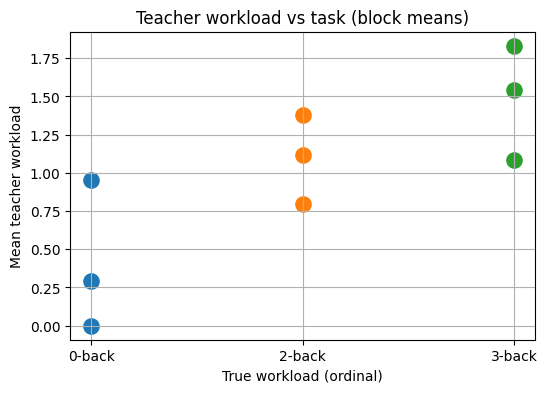

In [ ]:
import matplotlib.pyplot as plt

colors = {"0-back": "tab:blue", "2-back": "tab:orange", "3-back": "tab:green"}

plt.figure(figsize=(6,4))
for _, r in block_summary.iterrows():
    plt.scatter(
        label_to_y[r["label"]],
        r["mean_workload"],
        s=120,
        color=colors[r["label"]]
    )

plt.xticks([0,1,2], ["0-back", "2-back", "3-back"])
plt.xlabel("True workload (ordinal)")
plt.ylabel("Mean teacher workload")
plt.title("Teacher workload vs task (block means)")
plt.grid(True)
plt.show()

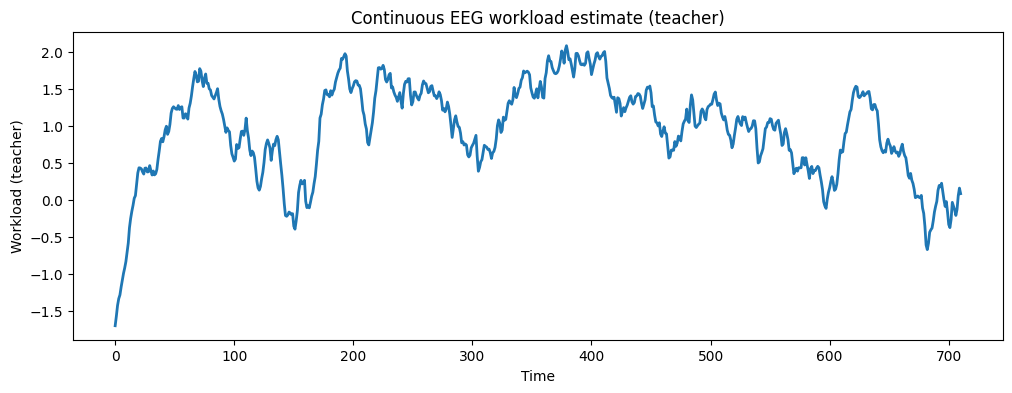

In [ ]:
# Convert window index → time if needed
window_times = np.arange(len(window_workload))  # or your real timestamps

def ema(x, alpha=0.05):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i-1]
    return y

workload_smooth = ema(window_workload, alpha=0.05)

plt.figure(figsize=(12,4))
plt.plot(window_times, workload_smooth, linewidth=2)
plt.xlabel("Time")
plt.ylabel("Workload (teacher)")
plt.title("Continuous EEG workload estimate (teacher)")
plt.show()

In [ ]:
from scipy.stats import spearmanr

true_ord = []
pred_ord = []

for test_block in range(len(block_labels)):
    train_idx = np.arange(len(block_labels)) != test_block

    teacher_cv = make_pipeline(
        StandardScaler(),
        Ridge(alpha=1.0)
    )

    teacher_cv.fit(block_features[train_idx], y_block[train_idx])

    pred = teacher_cv.predict(block_features[[test_block]])[0]

    true_ord.append(y_block[test_block])
    pred_ord.append(pred)

rho, _ = spearmanr(true_ord, pred_ord)

print("LOBO Spearman rho (blocks):", rho)

LOBO Spearman rho (blocks): 0.10540925533894596


In [ ]:
import numpy as np

from mne.decoding import CSP
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:

X = np.asarray(X)
window_blocks = np.asarray(window_blocks)
y_win_str = np.asarray(y_win_str)

assert X.ndim == 3, f"X must be (n_windows, n_channels, n_times), got {X.shape}"
assert len(X) == len(window_blocks) == len(y_win_str), "Mismatch: windows not aligned."


In [ ]:
assert X.ndim == 3, f"X must be (n_windows, n_channels, n_times), got {X.shape}"

In [ ]:
assert len(X) == len(window_blocks) == len(y_win_str), "Mismatch: windows not aligned."

In [ ]:
# ----- encode labels to integers (CSP + sklearn likes ints) -----
classes = np.array(["0-back", "2-back", "3-back"])
label_to_int = {c: i for i, c in enumerate(classes)}
y = np.array([label_to_int[s] for s in y_win_str], dtype=int)

In [ ]:
# sanity: each block should have exactly one label
for b in np.unique(window_blocks):
    uniq = np.unique(y_win_str[window_blocks == b])
    if len(uniq) != 1:
        raise ValueError(f"Block {b} has multiple labels: {uniq}")

In [ ]:
y_true_all = []
y_pred_all = []

# you can tune this:
n_csp = 6   # number of CSP components (try 4, 6, 8)
reg = "ledoit_wolf"  # stable covariance shrinkage


In [ ]:
unique_blocks = np.unique(window_blocks)


In [ ]:
n_csp = 6   # number of CSP components (try 4, 6, 8)
reg = "ledoit_wolf"  # stable covariance shrinkage

In [ ]:
# ----- encode labels to integers (CSP + sklearn likes ints) -----
classes = np.array(["0-back", "2-back", "3-back"])
label_to_int = {c: i for i, c in enumerate(classes)}
y = np.array([label_to_int[s] for s in y_win_str], dtype=int)


In [ ]:
# sanity: each block should have exactly one label
for b in np.unique(window_blocks):
    uniq = np.unique(y_win_str[window_blocks == b])
    if len(uniq) != 1:
        raise ValueError(f"Block {b} has multiple labels: {uniq}")

In [ ]:
y_true_all = []
y_pred_all = []


In [ ]:
# you can tune this:
n_csp = 6   # number of CSP components (try 4, 6, 8)
reg = "ledoit_wolf"  # stable covariance shrinkage


In [ ]:
unique_blocks = np.unique(window_blocks)

In [ ]:

for test_block in unique_blocks:
    train_mask = window_blocks != test_block
    test_mask  = window_blocks == test_block

    X_train = X[train_mask]
    y_train = y[train_mask]

    X_test  = X[test_mask]
    y_test  = y[test_mask]

    # ---- Block-level CSP: fit on TRAIN ONLY ----
    csp = CSP(
        n_components=n_csp,
        reg=reg,
        log=True,         # return log-variance features
        norm_trace=False  # don't force trace normalization unless you know you want it
    )

    # Important: CSP expects input (n_epochs, n_channels, n_times).
    # We treat each WINDOW as an "epoch".
    # But labels are block labels: every window in a block shares that label.
    X_train_csp = csp.fit_transform(X_train, y_train)
    X_test_csp  = csp.transform(X_test)

    # ---- classifier on CSP features (simple + robust) ----
    clf = make_pipeline(
        StandardScaler(),
        LogisticRegression(
            max_iter=2000,
            multi_class="multinomial"
        )
    )
    clf.fit(X_train_csp, y_train)
    y_pred = clf.predict(X_test_csp)

    y_true_all.append(y_test)
    y_pred_all.append(y_pred)


Computing rank from data with rank=None
    Using tolerance 0.0031 (2.2e-16 eps * 30 dim * 4.7e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using LEDOIT_WOLF
Done.
Estimating class=1 covariance using LEDOIT_WOLF
Done.
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


    Using tolerance 0.0029 (2.2e-16 eps * 30 dim * 4.4e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using LEDOIT_WOLF
Done.
Estimating class=1 covariance using LEDOIT_WOLF
Done.
Estimating class=2 covariance using LEDOIT_WOLF
Done.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Computing rank from data with rank=None
    Using tolerance 0.0031 (2.2e-16 eps * 30 dim * 4.7e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using LEDOIT_WOLF
Done.
Estimating class=1 covariance using LEDOIT_WOLF
Done.
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


    Using tolerance 0.0029 (2.2e-16 eps * 30 dim * 4.4e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using LEDOIT_WOLF
Done.
Estimating class=1 covariance using LEDOIT_WOLF
Done.
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


    Using tolerance 0.003 (2.2e-16 eps * 30 dim * 4.6e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using LEDOIT_WOLF
Done.
Estimating class=1 covariance using LEDOIT_WOLF
Done.
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


    Using tolerance 0.0026 (2.2e-16 eps * 30 dim * 3.9e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using LEDOIT_WOLF
Done.
Estimating class=1 covariance using LEDOIT_WOLF
Done.
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


    Using tolerance 0.0029 (2.2e-16 eps * 30 dim * 4.4e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using LEDOIT_WOLF
Done.
Estimating class=1 covariance using LEDOIT_WOLF
Done.
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


    Using tolerance 0.0031 (2.2e-16 eps * 30 dim * 4.7e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using LEDOIT_WOLF
Done.
Estimating class=1 covariance using LEDOIT_WOLF
Done.
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


    Using tolerance 0.0031 (2.2e-16 eps * 30 dim * 4.7e+11  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using LEDOIT_WOLF
Done.
Estimating class=1 covariance using LEDOIT_WOLF
Done.
Estimating class=2 covariance using LEDOIT_WOLF
Done.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)


In [ ]:
print("\n==== Block-level CSP window decoding (Leave-One-Block-Out) ====")
print("Accuracy:", accuracy_score(y_true_all, y_pred_all))
print("Confusion matrix (rows=true, cols=pred):\n", confusion_matrix(y_true_all, y_pred_all))
print("\nReport:\n", classification_report(y_true_all, y_pred_all, target_names=classes))



==== Block-level CSP window decoding (Leave-One-Block-Out) ====
Accuracy: 0.11251758087201125
Confusion matrix (rows=true, cols=pred):
 [[ 25  32 180]
 [ 53  29 155]
 [ 49 162  26]]

Report:
               precision    recall  f1-score   support

      0-back       0.20      0.11      0.14       237
      2-back       0.13      0.12      0.13       237
      3-back       0.07      0.11      0.09       237

    accuracy                           0.11       711
   macro avg       0.13      0.11      0.12       711
weighted avg       0.13      0.11      0.12       711



In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (711, 30, 2000)
y shape: (711,)


In [ ]:
X_window_lda = lda.transform(window_features)
workload = X_window_lda[:, 0]

In [ ]:
workload_1d.shape

(711,)

In [ ]:
import numpy as np

# make sure workload_1d exists
workload_1d = np.asarray(workload)   # or workload_smooth

def temporal_features(w, K=10):
    """
    w : (n_windows,) workload signal
    K : history length (in windows)

    returns: (n_windows, 5)
    """
    n = len(w)
    feats = np.zeros((n, 5))

    for t in range(n):
        start = max(0, t - K)
        hist = w[start:t+1]

        # (1) absolute workload
        curr = w[t]

        # (2) deviation from recent mean
        mu = np.mean(hist)
        dev = curr - mu

        # (3) slope (trend)
        if len(hist) > 1:
            x = np.arange(len(hist))
            slope = np.polyfit(x, hist, 1)[0]
        else:
            slope = 0.0

        # (4) volatility
        sigma = np.std(hist)

        # (5) first derivative
        deriv = curr - w[t-1] if t > 0 else 0.0

        feats[t] = [curr, dev, slope, sigma, deriv]

    return feats

In [ ]:
X_temporal = temporal_features(workload_1d, K=10)
print(X_temporal.shape)  # (711, 5)

(711, 5)


In [ ]:
print("First 5 temporal feature rows:")
print(X_temporal[:5])

First 5 temporal feature rows:
[[-3.89626479  0.          0.          0.          0.        ]
 [-2.69055993  0.60285243  1.20570485  0.60285243  1.20570485]
 [ 8.25926831  7.70178711  6.07776655  5.46818523 10.94982824]
 [ 9.53550001  6.73351411  5.12451226  6.12692349  1.2762317 ]
 [ 7.30452589  3.60203199  3.46276413  5.76844968 -2.23097412]]


In [ ]:
print("Feature means:", X_temporal.mean(axis=0))
print("Feature stds:",  X_temporal.std(axis=0))


Feature means: [8.07068031e-02 9.91492322e-03 2.42754759e-02 7.79590169e+00
 4.41295354e-03]
Feature stds: [8.9242592  8.3414868  1.12838091 2.15796207 9.11388481]


In [ ]:
from scipy.stats import ttest_ind
import numpy as np

w0 = df[df.label == "0-back"].workload.values
w2 = df[df.label == "2-back"].workload.values
w3 = df[df.label == "3-back"].workload.values

def cohens_d(a, b):
    return (a.mean() - b.mean()) / np.sqrt((a.var() + b.var()) / 2)

print("0 vs 2 d =", cohens_d(w0, w2))
print("2 vs 3 d =", cohens_d(w2, w3))
print("0 vs 3 d =", cohens_d(w0, w3))

0 vs 2 d = -2.1950948794280087
2 vs 3 d = -1.3783381450511127
0 vs 3 d = -3.4978393755334003


In [ ]:
from sklearn.metrics import roc_auc_score

# binary example: 0-back vs 3-back
mask = np.isin(y, ["0-back", "3-back"])
y_bin = (y[mask] == "3-back").astype(int)

auc = roc_auc_score(y_bin, window_workload_smooth[mask])
print("AUROC (0 vs 3):", auc)


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
label_to_int = {"0-back": 0, "2-back": 1, "3-back": 2}
y_ord = np.array([label_to_int[l] for l in y])

from scipy.stats import spearmanr
rho, p = spearmanr(window_workload_smooth, y_ord)
print("Spearman rho:", rho, "p:", p)

Spearman rho: 0.21883752670107245 p: 3.711548745819249e-09


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(block_features)

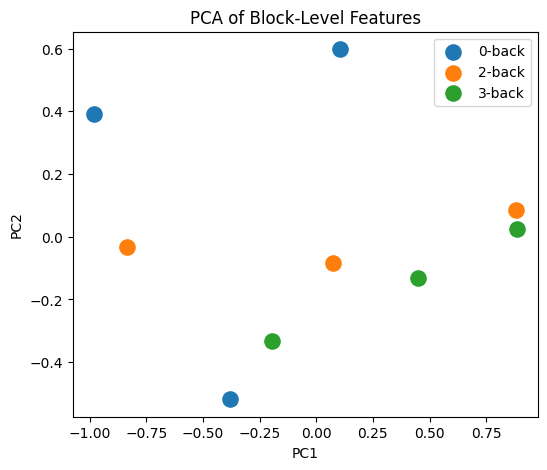

In [ ]:
plt.figure(figsize=(6,5))
for lbl in ["0-back", "2-back", "3-back"]:
    idx = block_labels == lbl
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], s=120, label=lbl)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Block-Level Features")
plt.legend()
plt.show()

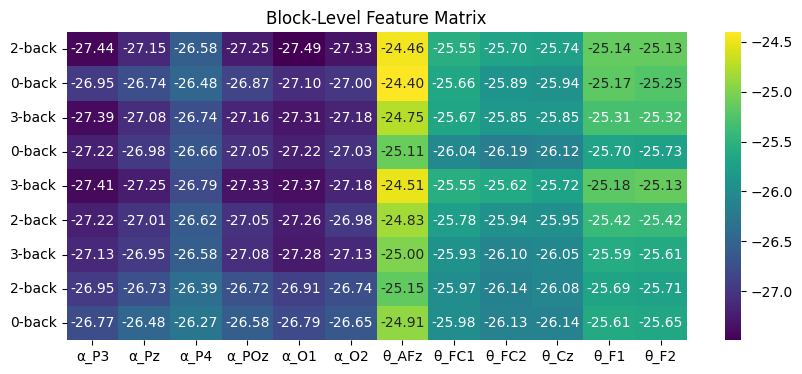

In [ ]:
import seaborn as sns
import numpy as np

feature_names = (
    ["α_P3","α_Pz","α_P4","α_POz","α_O1","α_O2"] +
    ["θ_AFz","θ_FC1","θ_FC2","θ_Cz","θ_F1","θ_F2"]
)

plt.figure(figsize=(10,4))
sns.heatmap(
    block_features,
    xticklabels=feature_names,
    yticklabels=block_labels,
    cmap="viridis",
    annot=True,
    fmt=".2f"
)
plt.title("Block-Level Feature Matrix")
plt.show()

In [ ]:
import numpy as np

F = np.column_stack([alpha_by_window, theta_by_window])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Fz = scaler.fit_transform(F)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
workload_raw = pca.fit_transform(Fz).flatten()

In [ ]:
labels_num = np.array([0 if l=="0-back" else 2 if l=="2-back" else 3 for l in y])

if np.corrcoef(workload_raw, labels_num)[0,1] < 0:
    workload_raw *= -1

In [ ]:
from scipy.ndimage import gaussian_filter1d

workload = gaussian_filter1d(workload_raw, sigma=2)

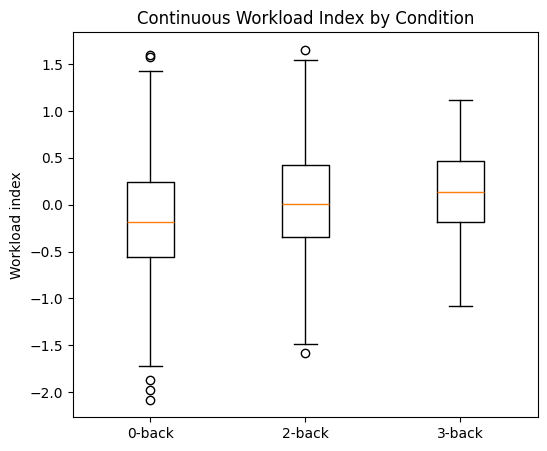

In [ ]:
import matplotlib.pyplot as plt

w0 = workload[labels == "0-back"]
w2 = workload[labels == "2-back"]
w3 = workload[labels == "3-back"]

plt.figure(figsize=(6,5))
plt.boxplot([w0, w2, w3], tick_labels=["0-back", "2-back", "3-back"])
plt.ylabel("Workload index")
plt.title("Continuous Workload Index by Condition")
plt.show()

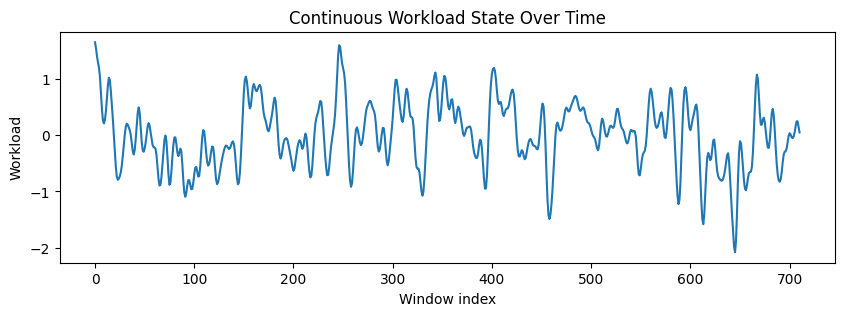

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(workload)
plt.xlabel("Window index")
plt.ylabel("Workload")
plt.title("Continuous Workload State Over Time")
plt.show()

In [ ]:
block_windows = []

for start_samp, end_samp, label in task_segments:
    start_win = int((start_samp - task_segments[0][0]) / step)
    end_win   = int((end_samp   - task_segments[0][0]) / step)
    block_windows.append((start_win, end_win, label))

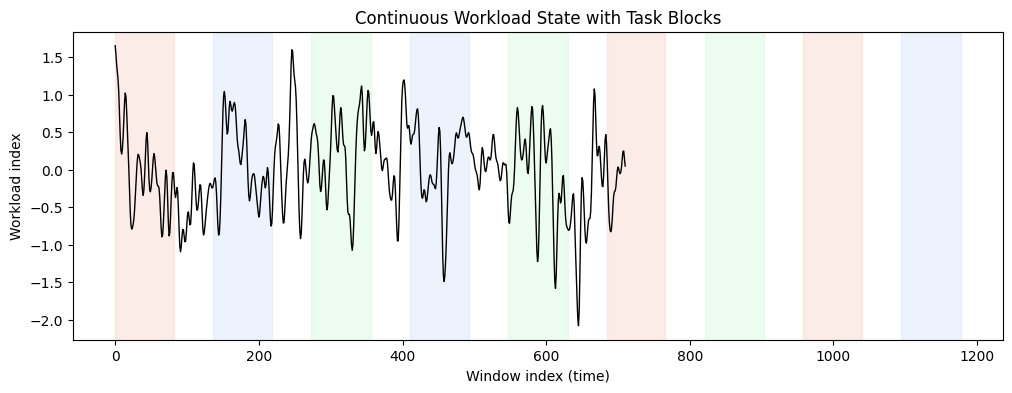

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(workload, color="black", linewidth=1)

colors = {
    "0-back": "#d0e1f9",
    "2-back": "#f9d0c4",
    "3-back": "#d0f9d8"
}

for start_w, end_w, label in block_windows:
    plt.axvspan(start_w, end_w, color=colors[label], alpha=0.4)

plt.xlabel("Window index (time)")
plt.ylabel("Workload index")
plt.title("Continuous Workload State with Task Blocks")
plt.show()

In [ ]:
block_windows = []

for start_samp, end_samp, label in task_segments:
    win_idx = [
        i for i, (w_start, _) in enumerate(meta)
        if (w_start >= start_samp) and (w_start <= end_samp)
    ]
    if len(win_idx) > 0:
        block_windows.append((win_idx[0], win_idx[-1], label))

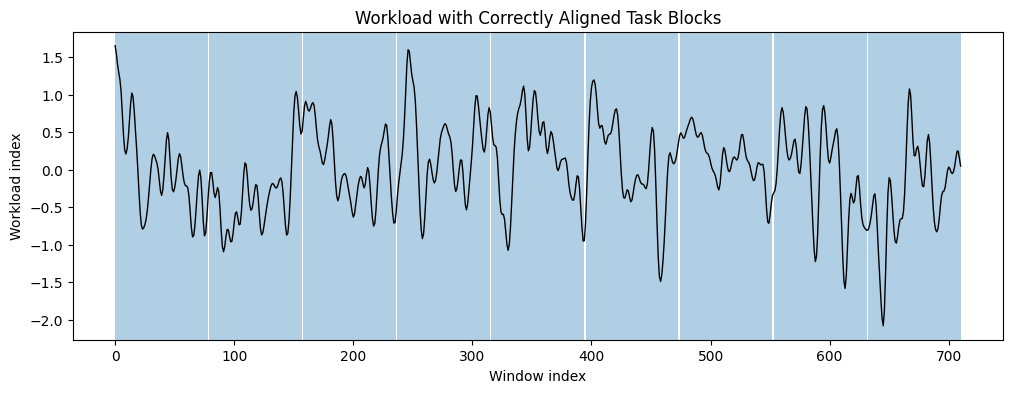

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(workload, color="black", linewidth=1)

for start_w, end_w, label in block_windows:
    plt.axvspan(start_w, end_w, alpha=0.35)

plt.xlabel("Window index")
plt.ylabel("Workload index")
plt.title("Workload with Correctly Aligned Task Blocks")
plt.show()

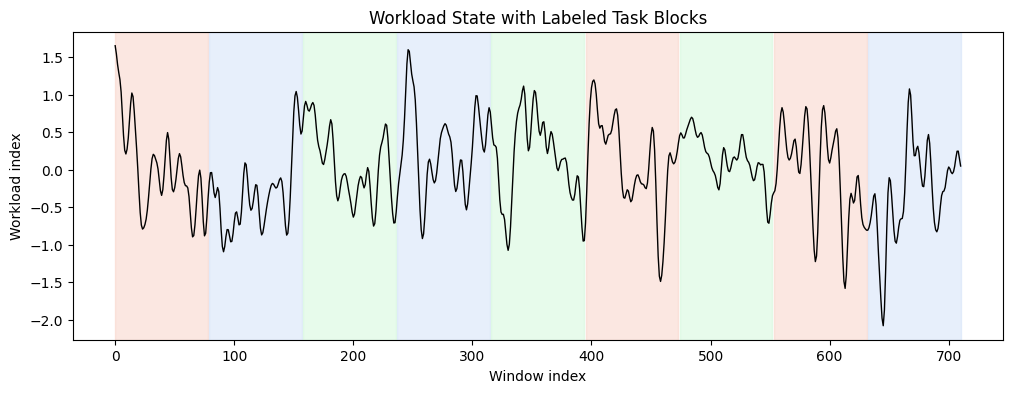

In [ ]:
colors = {
    "0-back": "#d0e1f9",  # blue
    "2-back": "#f9d0c4",  # orange
    "3-back": "#d0f9d8"   # green
}

plt.figure(figsize=(12,4))
plt.plot(workload, color="black", linewidth=1)

for start_w, end_w, label in block_windows:
    plt.axvspan(start_w, end_w, color=colors[label], alpha=0.5)

plt.xlabel("Window index")
plt.ylabel("Workload index")
plt.title("Workload State with Labeled Task Blocks")
plt.show()

In [ ]:
import numpy as np

X_feat = np.column_stack([
    alpha_by_window,   # Pz alpha
    theta_by_window    # FC1 theta
])

y_labels = np.array(y)

In [ ]:
label_map = {"0-back": 0, "2-back": 1, "3-back": 2}
y_num = np.array([label_map[l] for l in y_labels])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y_num,
    test_size=0.25,
    random_state=42,
    stratify=y_num
)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.43258426966292135

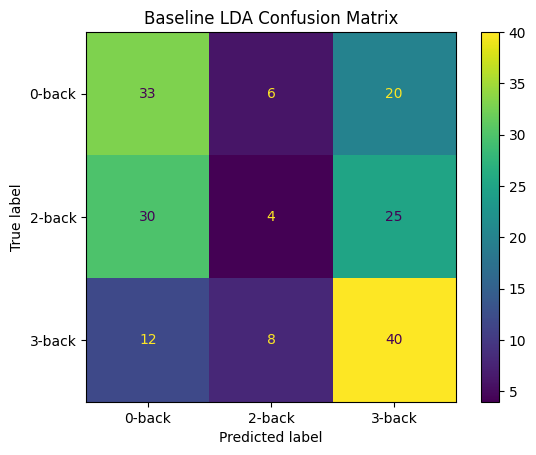

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["0-back", "2-back", "3-back"])
disp.plot()
plt.title("Baseline LDA Confusion Matrix")
plt.show()

In [ ]:
import numpy as np

def ema(x, alpha=0.1):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i-1]
    return y



In [ ]:
locals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', '_i2', '_exit_code', '_i3', 'mne', '_i4', '_i5', 'drive', '_i6', 'raw', '_i7', '_7', '_i8', '_8', '_i9', '_9', '_i10', 'events', 'event_id', '_i11', '_11', '_i12', 'stim_event_id', '_i13', 'epochs', '_i14', '_14', '_i15', '_15', '_i16', '_16', '_i17', '_17', '_i18', '_18', '_i19', '_i20', '_20', '_i21', '_i22', '_i23', 'np', '_i24', '_24', '_i25', '_25', '_i26', '_26', '_i27', 'Counter', '_27', '_i28', '_28', '_i29', '_i30', '_30', '_i31', '_31', '_i32', '_i33', '_i34', '_34', '_i35', 'sfreq', 'window_sec', 'window_samples', '_35', '_i36', 'block_codes', '_i37', 'block_samples', '_i38', '_38', '_i39', 'samples_only', '_i40', '_i41', 'block_info', '_i42', 'i', 'start_samp', 'label', 'end_samp', 'duration_sec', '_i43', '_43', '_i44', '_44', '_i45', '_45', '_i46', '_i47', '_4

In [ ]:
workload_smooth = ema(w, alpha=0.05)

NameError: name 'w' is not defined

In [ ]:
all_ch_names = [
 'FP1','AFF5','AFz','F1','FC5','FC1','T7','C3','Cz','CP5','CP1',
 'P7','P3','Pz','POz','O1',
 'FP2','AFF6','F2','FC2','FC6','C4','T8','CP2','CP6',
 'P4','P8','O2',
 'HEOG','VEOG'
]

In [ ]:
# remove EOG
eeg_ch_names = [ch for ch in all_ch_names if ch not in ("HEOG", "VEOG")]

# keep only channels that actually exist in raw
eeg_ch_names = [ch for ch in eeg_ch_names if ch in raw.ch_names]

In [ ]:

pick_idx = np.array([raw.ch_names.index(ch) for ch in eeg_ch_names])


In [ ]:
print("Using EEG channels:", eeg_ch_names)

Using EEG channels: ['FP1', 'AFF5', 'AFz', 'F1', 'FC5', 'FC1', 'T7', 'C3', 'Cz', 'CP5', 'CP1', 'P7', 'P3', 'Pz', 'POz', 'O1', 'FP2', 'AFF6', 'F2', 'FC2', 'FC6', 'C4', 'T8', 'CP2', 'CP6', 'P4', 'P8', 'O2']


In [ ]:
print("Number of channels:", len(pick_idx))

Number of channels: 28


In [ ]:
import numpy as np
from scipy.signal import welch

In [ ]:
def band_logpower_1d(x, sfreq, band, eps=1e-12):
    """
    x: (win_len,) 1D EEG signal
    band: (fmin, fmax)
    returns: log band power
    """
    fmin, fmax = band
    f, pxx = welch(x, fs=sfreq, nperseg=len(x))
    mask = (f >= fmin) & (f <= fmax)
    return np.log(np.mean(pxx[mask]) + eps)

In [ ]:
theta_band = (4, 7)
alpha_band = (8, 12)

In [ ]:
bands = [("theta", theta_band), ("alpha", alpha_band)]

In [ ]:
def featurize_windows(X, sfreq, pick_idx, bands):
    """
    X: (N, C, T)
    returns:
      X_feat: (N, n_features)
      feat_names: list of feature names
    """
    X = np.asarray(X)
    N, C, T = X.shape

    feat_names = []
    for band_name, _ in bands:
        for ch in pick_idx:
            feat_names.append(f"{band_name}_{raw.ch_names[ch]}")

    X_feat = np.zeros((N, len(feat_names)))

    col = 0
    for band_name, band in bands:
        for ch in pick_idx:
            for i in range(N):
                X_feat[i, col] = band_logpower_1d(
                    X[i, ch, :], sfreq, band
                )
            col += 1

    return X_feat, feat_names

In [ ]:
sfreq = raw.info["sfreq"]

In [ ]:
X_feat, feat_names = featurize_windows(
    X, sfreq, pick_idx, bands
)

In [ ]:
print("X_feat shape:", X_feat.shape)

X_feat shape: (711, 56)


In [ ]:
print("First 10 features:", feat_names[:10])

First 10 features: ['theta_FP1', 'theta_AFF5', 'theta_AFz', 'theta_F1', 'theta_FC5', 'theta_FC1', 'theta_T7', 'theta_C3', 'theta_Cz', 'theta_CP5']


In [ ]:
import numpy as np

In [ ]:
y = np.asarray(y)

In [ ]:
label_order = ["0-back", "2-back", "3-back"]
label_to_int = {lab: i for i, lab in enumerate(label_order)}

In [ ]:
y_num = np.array([label_to_int[l] for l in y])

In [ ]:
print("Label counts:")
for lab in label_order:
    print(lab, np.sum(y == lab))


Label counts:
0-back 237
2-back 237
3-back 237


In [ ]:
groups = np.zeros(len(y_num), dtype=int)
g = 0
for i in range(1, len(y_num)):
    if y_num[i] != y_num[i-1]:
        g += 1
    groups[i] = g

In [ ]:
print("Number of contiguous blocks:", groups.max() + 1)

Number of contiguous blocks: 9


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=2000,
        multi_class="auto",
        class_weight="balanced",
        solver="lbfgs"
    ))
])

In [ ]:
gkf = GroupKFold(n_splits=5)

accs = []
cms = []


In [ ]:
for fold, (train_idx, test_idx) in enumerate(
    gkf.split(X_feat, y_num, groups=groups), start=1
):
    pipe.fit(X_feat[train_idx], y_num[train_idx])

    y_pred = pipe.predict(X_feat[test_idx])
    acc = accuracy_score(y_num[test_idx], y_pred)
    cm = confusion_matrix(
        y_num[test_idx], y_pred,
        labels=[0, 1, 2]
    )

    accs.append(acc)
    cms.append(cm)

    print(f"Fold {fold}: accuracy = {acc:.3f}, test windows = {len(test_idx)}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 1: accuracy = 0.316, test windows = 158


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 2: accuracy = 0.241, test windows = 158


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 3: accuracy = 0.247, test windows = 158


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 4: accuracy = 0.228, test windows = 158


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 5: accuracy = 0.304, test windows = 79


In [ ]:
print("\nMean accuracy:", np.mean(accs))
print("Std accuracy:", np.std(accs))

print("\nAggregate confusion matrix:")
print(np.sum(cms, axis=0))


Mean accuracy: 0.26708860759493674
Std accuracy: 0.035892270579133745

Aggregate confusion matrix:
[[ 74  95  68]
 [ 65  52 120]
 [ 60 116  61]]


In [ ]:
X_feat_norm = X_feat.copy()

for g in np.unique(groups):
    idx = np.where(groups == g)[0]
    mu = X_feat[idx].mean(axis=0)
    sd = X_feat[idx].std(axis=0) + 1e-8
    X_feat_norm[idx] = (X_feat[idx] - mu) / sd

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, confusion_matrix

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        solver="lbfgs"
    ))
])


In [ ]:
gkf = GroupKFold(n_splits=5)

accs = []
cms = []

for fold, (train_idx, test_idx) in enumerate(
    gkf.split(X_feat_norm, y_num, groups=groups), start=1
):
    pipe.fit(X_feat_norm[train_idx], y_num[train_idx])
    y_pred = pipe.predict(X_feat_norm[test_idx])

    acc = accuracy_score(y_num[test_idx], y_pred)
    cm = confusion_matrix(y_num[test_idx], y_pred, labels=[0, 1, 2])

    accs.append(acc)
    cms.append(cm)

    print(f"Fold {fold}: accuracy = {acc:.3f}, test windows = {len(test_idx)}")

Fold 1: accuracy = 1.000, test windows = 158
Fold 2: accuracy = 0.000, test windows = 158
Fold 3: accuracy = 0.500, test windows = 158
Fold 4: accuracy = 0.000, test windows = 158
Fold 5: accuracy = 0.000, test windows = 79


In [ ]:
print("\nMean accuracy:", np.mean(accs))
print("Std accuracy:", np.std(accs))

print("\nAggregate confusion matrix:")
print(np.sum(cms, axis=0))


Mean accuracy: 0.3
Std accuracy: 0.39999999999999997

Aggregate confusion matrix:
[[237   0   0]
 [237   0   0]
 [237   0   0]]


In [ ]:
import numpy as np

X = np.asarray(X)                 # (N, C, T)
y = np.asarray(y)

mask_03 = (y == "0-back") | (y == "3-back")
X_03 = X[mask_03]
y_03 = y[mask_03]
groups_03 = groups[mask_03]

# map to 0/1 for CSP+LDA
y_03_num = (y_03 == "3-back").astype(int)   # 0 = 0-back, 1 = 3-back

print("X_03 shape:", X_03.shape)
print("Counts:", np.sum(y_03=="0-back"), np.sum(y_03=="3-back"))
print("Num groups:", groups_03.max() + 1)

X_03 shape: (474, 30, 2000)
Counts: 237 237
Num groups: 9


In [ ]:
from mne.filter import filter_data

sfreq = raw.info["sfreq"]


In [ ]:
def bandpass_windows(X_in, sfreq, l_freq, h_freq):
    """
    X_in: (N, C, T)
    returns X_filt: (N, C, T) bandpassed
    """
    X_in = np.asarray(X_in, dtype=np.float64)
    N, C, T = X_in.shape
    X_out = np.empty_like(X_in)

    for i in range(N):
        X_out[i] = filter_data(
            X_in[i], sfreq=sfreq,
            l_freq=l_freq, h_freq=h_freq,
            verbose=False
        )
    return X_out

In [ ]:
X_03_alpha = bandpass_windows(X_03, sfreq, 8, 12)
print("Filtered alpha windows:", X_03_alpha.shape)

Filtered alpha windows: (474, 30, 2000)


In [ ]:
from mne.decoding import CSP


In [ ]:
csp = CSP(
    n_components=6,     # start with 4–8; 6 is a good default
    reg=None,
    log=True,           # log-variance features
    norm_trace=False
)


In [ ]:
# CSP expects (n_epochs, n_channels, n_times)
X_csp = csp.fit_transform(X_03_alpha, y_03_num)
print("CSP feature shape:", X_csp.shape)   # (N_epochs, n_components)

Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 30 dim * 1.8e+10  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
CSP feature shape: (474, 6)


In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LinearDiscriminantAnalysis())
])


In [ ]:

gkf = GroupKFold(n_splits=5)

In [ ]:
accs = []
cms = []


In [ ]:

for fold, (tr, te) in enumerate(gkf.split(X_csp, y_03_num, groups=groups_03), start=1):
    pipe.fit(X_csp[tr], y_03_num[tr])
    pred = pipe.predict(X_csp[te])

    acc = accuracy_score(y_03_num[te], pred)
    cm = confusion_matrix(y_03_num[te], pred, labels=[0, 1])

    accs.append(acc)
    cms.append(cm)

    print(f"Fold {fold}: acc = {acc:.3f}, test_windows = {len(te)}")


Fold 1: acc = 0.494, test_windows = 158
Fold 2: acc = 0.241, test_windows = 79
Fold 3: acc = 0.924, test_windows = 79
Fold 4: acc = 0.633, test_windows = 79
Fold 5: acc = 0.620, test_windows = 79


In [ ]:
# Requires an info object with montage, which raw.info usually has
csp.plot_patterns(raw.info, components=[0, 1, 2], ch_type="eeg", units="Patterns (a.u.)")

NOTE: plot_patterns() is a legacy function. New code should use get_spatial_filter_from_estimator(clf, info=info).plot_patterns().


RuntimeError: No digitization points found.

In [ ]:
import mne

montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, on_missing="ignore")

<RawBrainVision | nback2.eeg, 30 x 696820 (696.8 s), ~159.5 MiB, data loaded>

In [ ]:
import mne
import numpy as np

# EEG only, explicitly exclude EOG
eeg_picks = mne.pick_types(
    raw.info,
    eeg=True,
    eog=False,
    stim=False
)

print("Number of EEG channels:", len(eeg_picks))
print("EEG channels:", [raw.ch_names[i] for i in eeg_picks])

Number of EEG channels: 30
EEG channels: ['FP1', 'AFF5', 'AFz', 'F1', 'FC5', 'FC1', 'T7', 'C3', 'Cz', 'CP5', 'CP1', 'P7', 'P3', 'Pz', 'POz', 'O1', 'FP2', 'AFF6', 'F2', 'FC2', 'FC6', 'C4', 'T8', 'CP2', 'CP6', 'P4', 'P8', 'O2', 'HEOG', 'VEOG']


In [ ]:
# X has shape (N, C, T) with ALL channels
# We now slice channels → EEG only

X_03_eeg = X_03[:, eeg_picks, :]
print("X_03_eeg shape:", X_03_eeg.shape)

X_03_eeg shape: (474, 30, 2000)


In [ ]:
from mne.filter import filter_data

sfreq = raw.info["sfreq"]

def bandpass_windows(X_in, sfreq, l_freq, h_freq):
    X_out = np.empty_like(X_in)
    for i in range(X_in.shape[0]):
        X_out[i] = filter_data(
            X_in[i],
            sfreq=sfreq,
            l_freq=l_freq,
            h_freq=h_freq,
            verbose=False
        )
    return X_out


In [ ]:

X_03_alpha = bandpass_windows(X_03_eeg, sfreq, 8, 12)
print("Filtered shape:", X_03_alpha.shape)

Filtered shape: (474, 30, 2000)


In [ ]:
from mne.decoding import CSP

csp = CSP(
    n_components=6,
    reg=None,
    log=True,
    norm_trace=False
)


In [ ]:
X_csp = csp.fit_transform(X_03_alpha, y_03_num)
print("CSP features shape:", X_csp.shape)

Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 30 dim * 1.8e+10  max singular value)
    Estimated rank (data): 30
    data: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
CSP features shape: (474, 6)


In [ ]:
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, on_missing="ignore")

<RawBrainVision | nback2.eeg, 30 x 696820 (696.8 s), ~159.5 MiB, data loaded>

In [ ]:
raw_eeg = raw.copy().pick(eeg_picks)

In [ ]:
csp.plot_patterns(
    raw_eeg.info,
    components=[0, 1, 2],
    ch_type="eeg",
    units="Patterns (a.u.)"
)

NOTE: plot_patterns() is a legacy function. New code should use get_spatial_filter_from_estimator(clf, info=info).plot_patterns().


ValueError: The following electrodes have overlapping positions, which causes problems during visualization:
FP1, AFF5, FP2, AFF6, HEOG, VEOG